In [2]:
#import libs
import seaborn as sns
planets = sns.load_dataset("planets")
planets.head() #veri gösterimi

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
#veriyi yedekliyoruz
df = planets.copy()

In [4]:
df.head() #verisetini kontrol amaçlı ilk 5 verisine göz attık.

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
#veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [6]:
#verilerin tiplerinie erişelim.
df.dtypes

method             object
number              int64
orbital_period    float64
mass              float64
distance          float64
year                int64
dtype: object

In [7]:
#dönüşüm işlemi yapalım.
#object tipini kategorik değişkene atayalım.
import pandas as pd
df.method = pd.Categorical(df.method)

In [8]:
df.dtypes

method            category
number               int64
orbital_period     float64
mass               float64
distance           float64
year                 int64
dtype: object

In [9]:
#Genel olarak verilerin boyut değişkenine erişelim. 
#1035 değer ve 6 başlıktan oluşuyor.
df.shape

(1035, 6)

In [10]:
#Verilerin Değişkenlerine ulaşmak için alltaki kodu kullandık.
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [11]:
df.describe().T #T işlemi Transpose işlemidir ve aşağıdaki durumu yapar.
#bu fonkisyon eksik gözlemleri siler ve kategorik değişkenleri dışarıda bırakır.

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [12]:
#eksik değer anlalizi yapalım.
df.isnull().values.any()

True

In [13]:
#hangi değerlerde boş değerler olduğuna göz atalım.
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [14]:
#null değerleri silelim
df.dropna()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [15]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [16]:
#fillna ile bilrikte inplace argümanını aktif edip boş olan veri değerlerine 0 versini girdik.
df["orbital_period"].fillna(0, inplace = True)

In [17]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass              522
distance          227
year                0
dtype: int64

In [18]:
#verilerin Null kısmına ortalama değer girmek için ise
df["mass"].fillna(df.mass.mean(),inplace = True)

In [19]:
df.isnull().sum()

method              0
number              0
orbital_period      0
mass                0
distance          227
year                0
dtype: int64

In [20]:
#Veri setimizdeki tüm değişkenlere 0 vermek istiyorsak;
df.fillna(df.mean(),inplace = True)

C:\Users\kayai\AppData\Local\Temp\ipykernel_18108\3556422335.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace = True)


In [21]:
df.isnull().values.any()

False

In [22]:
#yukarı kısımda veriler üzerinde birçok işlem yaptık ve başında verimizin bir kopyasını almıştık şimdi verimizi tekrardan çağırıyoruzç.
df = planets.copy()

In [23]:
df.isnull().values.any()

True

In [24]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [25]:
#verimiz eski haline geldi......

In [26]:
#Kategorik değişkenleri seçme işlemlerini yapalım.

kat_df = df.select_dtypes(include = ["object"])

In [27]:
kat_df.head() #çıktımızda da olduğu gibi veri setimizde 1 tane kategorik değişken vardı ve bu da çıktımızda görünüyor.

,method
0,Radial Velocity
1,Radial Velocity
2,Radial Velocity
3,Radial Velocity
4,Radial Velocity


In [28]:
#bu kategorik değişkenlerin sınıflarına ve sınıf sayılarına erişmeye çalışalım..
kat_df.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [29]:
#yukarıda veri setimizdeki kategorilerin çıktısnı görüyoruz.
#kategorileri saydıralım
kat_df["method"].value_counts().count()


10

In [30]:
#bu veri setimizin 10 sınıfı var ve kategorik isimleri de yukarıdaki gibi..
#aşağıda frekanslara ulaşalaım 
#frekans = hangi kategoriden kaç tane var?

In [31]:
kat_df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

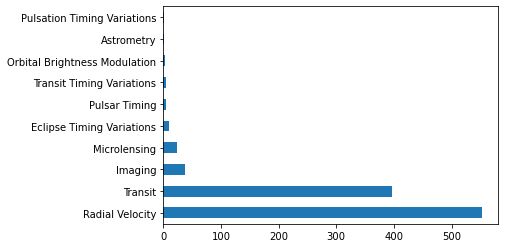

In [32]:
#veri setimizi bir sütun grafiğinde görselleştirelim.
df["method"].value_counts().plot.barh();

In [33]:
df_num = df.select_dtypes(include = ["float64","int64"])
#yukarıda sürekli değişkenlere erişmek istedik.

In [34]:
df_num.head()

,number,orbital_period,mass,distance,year
0,1,269.300,7.10,77.40,2006
1,1,874.774,2.21,56.95,2008
2,1,763.000,2.60,19.84,2011
3,1,326.030,19.40,110.62,2007
4,1,516.220,10.50,119.47,2009


In [35]:
df_num.describe().T 

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507,1.240976,1.000000,1.00000,1.0000,2.000,7.0
orbital_period,992.0,2002.917596,26014.728304,0.090706,5.44254,39.9795,526.005,730000.0
mass,513.0,2.638161,3.818617,0.003600,0.22900,1.2600,3.040,25.0
distance,808.0,264.069282,733.116493,1.350000,32.56000,55.2500,178.500,8500.0
year,1035.0,2009.070531,3.972567,1989.000000,2007.00000,2010.0000,2012.000,2014.0


In [36]:
df_num["distance"].describe() 
#belirli değişkeni betimeleme

count     808.000000
mean      264.069282
std       733.116493
min         1.350000
25%        32.560000
50%        55.250000
75%       178.500000
max      8500.000000
Name: distance, dtype: float64

In [37]:
#verileri kişiselleştirme ve max, min, medyan, standart sapma, ortalama hesaplama.
print("Ortalama: "+str(df_num["distance"].mean()))
print("Dolu Veri Sayısı: "+str(df_num["distance"].count()))
print("Maksimum Değer: "+str(df_num["distance"].max()))
print("Minimum Değer: "+str(df_num["distance"].min()))
print("Medyan: "+str(df_num["distance"].median()))
print("Standart Sapma: "+str(df_num["distance"].std()))

Ortalama: 264.06928217821786
Dolu Veri Sayısı: 808
Maksimum Değer: 8500.0
Minimum Değer: 1.35
Medyan: 55.25
Standart Sapma: 733.1164929404422


In [39]:
#Farklı bir veri seti üzerinde çalışalım.
#               ...Diamonds...
#price : dolar cinsinde fiyat (326-18,823)
#carat : ağırlık (0.2-5.01)
#cut : kalite (Fair, Good, Very Good, Premium, İdeal)
#color : renk (from J(worst) to D(best))
#clarity : berraklığı, temizliği (I1(worst), SI2,SI1,VS2,VS1,VVS2,VVS1,IF(best))
# x : lenght in mm (0-10.74)
# y : width in mm (0-58.9)
# z : depth in mm (0-31.8)
# depth : toplam derinlik yüzdesi = z / mean(x,y) = 2 * z /(x+y)(43-79)
#table : elmasın en geniş noktasına göre genişliği (43-95)



In [41]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()
#verimizi görselliştirmek için seaborn kütüphanesini tanımladık.
#verimizi tanımlama sonrası bir kopyasını aldık bunu yapmamızın sebebi ana veri tabanını değiştirmemek.
#sonrasında head komutu ile tanımladığımız diamonds veri setini ekrana yazdırdık.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [43]:
df.isnull()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
53935,False,False,False,False,False,False,False,False,False,False
53936,False,False,False,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False,False,False,False


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [49]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [50]:
kt_df = df.copy()

In [58]:
#value_counts() işlemi kategorinin frekansının çıktsını ekrana yazdırır.
#frekans = Bir kategori içinde verinin gözlenme sıklığı
kt_df["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [59]:
kt_df["color"].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [60]:
kt_df["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [61]:
kt_df["depth"].value_counts()

62.0    2239
61.9    2163
61.8    2077
62.2    2039
62.1    2020
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: depth, Length: 184, dtype: int64

In [62]:
kt_df["table"].value_counts()

56.0    9881
57.0    9724
58.0    8369
59.0    6572
55.0    6268
        ... 
51.6       1
63.5       1
43.0       1
62.4       1
61.6       1
Name: table, Length: 127, dtype: int64

In [63]:
kt_df["price"].value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: price, Length: 11602, dtype: int64

In [64]:
#ordinal tanımlama
from pandas.api.types import CategoricalDtype

In [65]:
df.cut.head()

0      Ideal
1    Premium
2       Good
3    Premium
4       Good
Name: cut, dtype: category
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [68]:
df.cut = df.cut.astype(CategoricalDtype(ordered = True))
#cut sütununudaki verilerin kategorisini sıralı olarak (ordered) değiştirme işlemini yapar.
#çıktımız görüldüğü gibi fair>good>very good>premium>ideal

In [69]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [74]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Ideal' < 'Premium' < 'Very Good' < 'Good' < 'Fair']

In [75]:
#yukarıdaki sıralama veri seti hikayemizin sıralamasından farklı olduğu için,
#bu duruma el atıp bir sıralama listesi oluşturuyoruz.
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"] 

In [76]:
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler,ordered = True))
#oluşturduğumuz listeyi kategorik olarak tekrardan tanımladık.
#şimdi ekrana yazıp kontrol edelim

In [77]:
df.cut.head(1)

0    Ideal
Name: cut, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

In [78]:
#işte şimdi veri sıralamamız, veri seti hikayemize uygun oldu.

In [79]:
#yukarıdaki yaptığımız veri seti işlemini sadece "cut" başlığı ile değil diğer kategoriler ile de yapalım.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [80]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [81]:
#burada renkleri ilk başta liste oluşturmadan CategoricalDtype metodu ile sıralayalım.
df.color = df.color.astype(CategoricalDtype(ordered = True))

In [82]:
df.color.head(1)

0    E
Name: color, dtype: category
Categories (7, object): ['D' < 'E' < 'F' < 'G' < 'H' < 'I' < 'J']

In [86]:
#veri seti hikayemizi incelediğimizde sıralamamız bu sıralama ile uyuşmuyor çünkü D en iyisi, J ise en kötüsü
#bu yüzden bir liste oluşturup listeyi CategoricalDtype metoduyla ordinal hale çevirelim.
color_kategoriler = ["J","I","H","G","F","E","D"]
df.color = df.color.astype(CategoricalDtype(categories = color_kategoriler,ordered = True))

In [87]:
df.color.head()

0    E
1    E
2    E
3    I
4    J
Name: color, dtype: category
Categories (7, object): ['J' < 'I' < 'H' < 'G' < 'F' < 'E' < 'D']

In [88]:
#verilerimizi listeleme yöntemi ile ordinal hale çevirip kontrol ettik ve veri seti hikayemizle uygun görünüyor.
#aynı işlemleri diğer kategoriler için yapalım.

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [92]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [93]:
#veriseti sıralaması IF en iyisi, I1 en kötüsü

In [94]:
df.clarity = df.clarity.astype(CategoricalDtype(ordered = True))

In [95]:
df.clarity.head(1)

0    SI2
Name: clarity, dtype: category
Categories (8, object): ['IF' < 'VVS1' < 'VVS2' < 'VS1' < 'VS2' < 'SI1' < 'SI2' < 'I1']

In [96]:
#sıralama yanlış ve bunu düzeltelim.

In [103]:
clarity_kategorisi = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
df.clarity = df.clarity.astype(CategoricalDtype(categories = clarity_kategorisi,ordered = True))

In [104]:
df.clarity.head()

0    SI2
1    SI1
2    VS1
3    VS2
4    SI2
Name: clarity, dtype: category
Categories (8, object): ['I1' < 'SI2' < 'SI1' < 'VS2' < 'VS1' < 'VVS2' < 'VVS1' < 'IF']

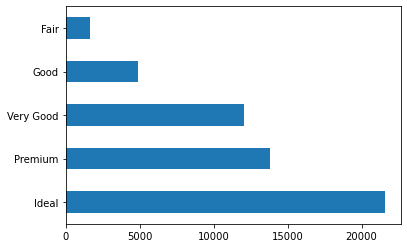

In [106]:
#Dağılım grafikleri hakkında
#BARPLOT
df["cut"].value_counts().plot.barh();
#bu kod parçacığında df olarak tanımladığımız veri setimizin içindeki "cut" başlığındaki verileri plot kütüphanesindeki bar metodu ile sütun grafiklerine dökmüş bulunduk.
#sonuna ";" koymamızın sebebi bilgi notunu siliyor.

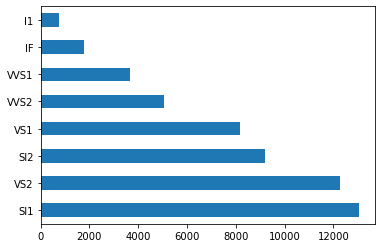

In [107]:
df["clarity"].value_counts().plot.barh();

In [110]:
#verilen grafiklere bir başlık eklemek istiyorsak;
#kod sonuna set_title("istenilen_baslik"); kısmını girmeliyiz.

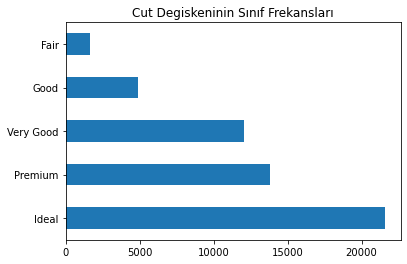

In [116]:
df["cut"].value_counts().plot.barh().set_title("Cut Degiskeninin Sınıf Frekansları");

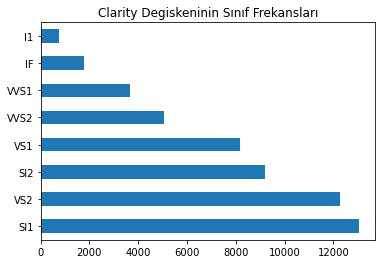

In [115]:
df["clarity"].value_counts().plot.barh().set_title("Clarity Degiskeninin Sınıf Frekansları");

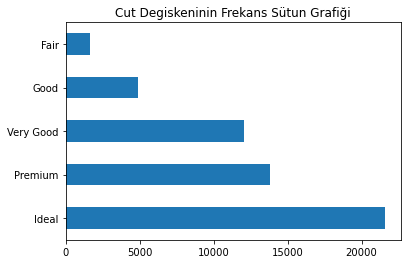

In [118]:
#Daha kolay veri görselleştirmek için şu şekil bir yazım tarzı tercih edilebilir.
(df["cut"]
 .value_counts()  #veri setine hangi metodu uygulayacağımız bu satırda
 .plot.barh()     #veri setine nasıl bir görselleştirme uygulayacağımız bu satırda
 .set_title("Cut Degiskeninin Frekans Sütun Grafiği")); #title atacağımız satır burada...



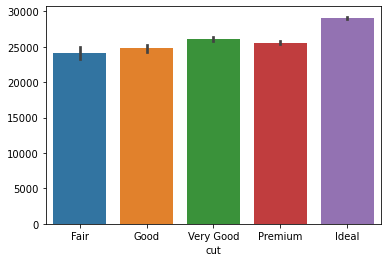

In [121]:
#seaborn kütüphanesi ile görselleştirelim.
sns.barplot(x = "cut",y = df.cut.index, data = df);

#burada sns ile import ettiğimiz seaborn kütüphanemizi kullandık ve
#bir çubuk sütun grafiği kullnacağımızı barplot ile belirttik
#sonrasında ise parantez açıp x eksenine hangi sütun başlığımızı koyacağımızı seçtik
#ve sonrasında y eksenine "cut" sütununun tek tek index değerlerini almasını söyledik.
# en sona ise bunu hangi veri setinde yapacağını tanımladık yani df'ye
# df bizim data frame oluyor bunu data değişkeninin içine attık.
# özet olarak 3 tane ana parametre kullandık
# BİRİNCİSİ X eksenine seçilecek sütun seçeneği
# İKİNCİSİ y eksenine seçilecek indeks değeri. Bu indeks değeri x eksenine göre seçilmeli.
# ÜÇÜNCÜSÜ ise birinci ve ikinci işlemin hangi data'da yapılacağını seçmek oldu.


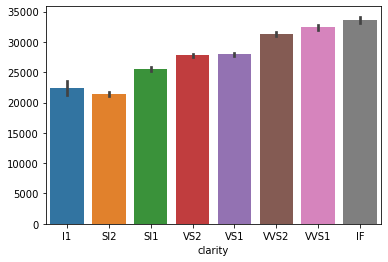

In [123]:
sns.barplot(x = "clarity",y = df.clarity.index, data = df);

In [124]:
#birden fazla kategorileri birlikte çaprazlayarak analiz edelim.
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
cut_kategoriler = ["Fair","Good","Very Good","Premium","Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_kategoriler, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


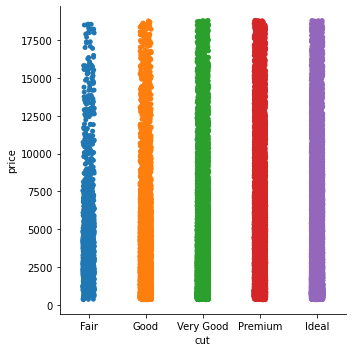

In [125]:
sns.catplot(x = "cut", y = "price", data = df);
#catplot metodu iki veri arasındaki çapraz görselleştirmeye yarar.

In [126]:
#----------------------Grafik Analizi---------------------
#yukarıdaki grafiğin anlatmaya çalıştığı Fair sınıfındaki bir elmasın fiyatlara göre yoğunluğudur.
#yukarıda da görüldüğü gibi Fair yani en kalitesiz elmasların yüksek fiyatlara doğru çıkıldıkça yoğunluğunun azaldığını gözlemlekteyiz.
#bu gözlem ise Kötü sınıfta olan bir elmasın fiyatı yüksek bir değerde satış oranı ideal sınıfta olan bir elmasa göre daha azdır.

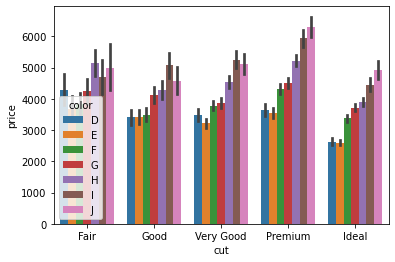

In [128]:
#hue argümanı bize 3 tane parametreyi bir grafikte göstermemizi sağladı 
# ilk iki argüman x ve y olurken üçüncü argümanımız ise color değişkeni oldu.
sns.barplot(x = "cut", y = "price", hue = "color", data = df);


In [129]:
#-----------------------------Grafik Analizi---------------------
#yukarıdaki grafik bize elmasların renklerinin ve olduğu sınıfın price,
#değişkeniyle aralarındaki bağı anlatmaya çalışıyor.
#mesela Premium sınıfındaki J renginde olan (yani en yüksek değere sahip olan elmas rengi) elmasın price değişkeninde nereye geldiğini göstererek,
#bize bir analiz fırsatı tanır.
#grafiklerin üstündeki küçük siyah çubuklar standart sapmayı (standart hata) belirler.
# İşin içine 3 farklı parametre girince olayımız büyük resime bakmaya döner ve
# price değişkeni ana resme bakmak için otomatik bir şekilde ortalaması alınıp grafiğe döküldü.


In [133]:
#-------------------------Grafik Doğrulaması----------------------
#bir veriyi grafiğe dökmek önemli değildir.
#verinin grafiğe dökülmüş halinin doğruluğu önemlidir.
#şimdi görselleştirilmiş verinin doğruluğunu test edelim.
df.groupby(["cut","color"])["price"].mean()

#burada bir groupby kullandık ve içine cut ve color sütunlarını kırdırdık.
#kırılan bu iki sütunu ise price sütunu ile çaprazlayıp 
#mean metodu ile medyanı (ortalam degeri) ölçüp ekrana yazdık.

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

In [134]:
#çıktılar ile görselleşmiş veriyi analiz edince verilerin doğruluğu göz kararı seçilebiliyor.
#bu sayede görselleştirdiğimiz verinin doğruluğunu test edip onayladık.
#                           ----ÖZETLE-----
# barplot veri görselleştirmeyi çağırıp üçüncü boyut olan hue argümanını kullanırsak,
# verimizin y ekseni ortalama değere dönüşüp bir toplulaştırma işlemi uyguluyor.
# bu toplulaştırma işlemini groupby ile test edip onaylayabiliriz.

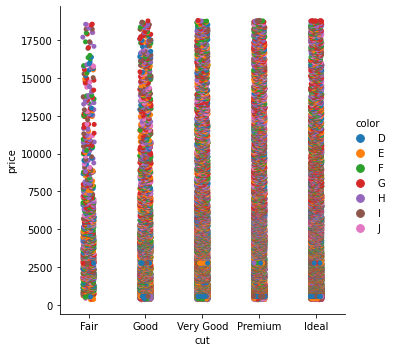

In [130]:
sns.catplot( x = "cut", y = "price", hue = "color",data = df);

In [131]:
#yine yukarıdaki grafikte cat metodu ile yoğunluk grafiği çizdirip yoğunlukları belirleyen renkleri de,
#hue argümanı ile tespit ettik.


In [135]:
# ------------------ HİSTOGRAM VE YOĞUNLUK GRAFİKLERİ-------------------

In [16]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


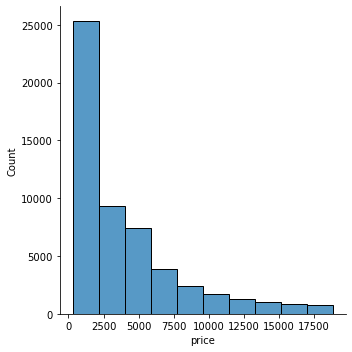

In [17]:
sns.displot(df.price, bins = 10, kde = False);
#yukarıdaki kodun amacı price değişkeninin frekansını ekrana yazdırır yani çıkarmak istediğimiz sonuç,
#fiyarı 0-2500 dolar olan mücehverlerin alım sayısının yoğunluğu ile ilgili bir analiz çıkartıyor.
#bins değişkeni görselleştirmek istediğimiz grafiğin kaç çubuktan oluşacağını belirler.
#bins = 10 ifadesi 10 çubukla görselleştirme anlamına gelir.
#kde argümanı ise yoğunluğun grafiğe eklenip eklenmeyeceğini belirler.
#aşağıdaki grafikte kde yani yoğunluk paramteresi dahil değildir.

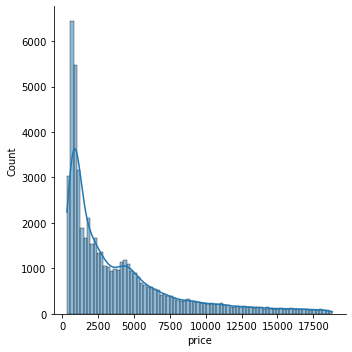

In [18]:
sns.displot(df.price,  kde = True);
#aşağıdaki görselleşmiş grafikte yoğunluk parametresi de devreye girip ince bir çizgi ile ifade edilmiştir.

In [26]:
df["price"].describe()
#%50 değeri medyandır.
#std standart sapma
#mean ortalama deger
#count toplam veri sayısı
#max ve min en yüksek ve en düşük değerler
#bu değerler ile görselleşmiş grafikler birlikte analiz edilince,
#görselleşmiş verinin doğruluğuna onay verebiliyoruz.

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
#--------------------GRAFİK ANALİZİ------------------------
#Standart sapması çok düşük değil çünkü 0-2500 arasıyla diğer değerlerin yayvan olduğu görülüyor.
#Çarpık bir dağılımının olduğu da görülebiliyor
#Pozitif çarpıklık söz konusu çünkü sağ kuyruk daha uzun.
#eğer sol kuyruk daha uzun olsaydı negatif çarpıklık diyebilirdik.

In [19]:
#genel olarak argümanları görmek için;
#?sns.distplot
#yazarak erişebilirsiniz.


C:\Users\kayai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


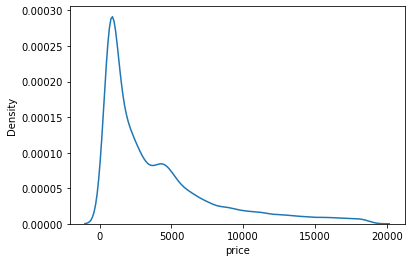

In [25]:
#----------------EĞER SADECE YOĞUNLUK GRAFİĞİNİ YAZDIRMAK İSTERSEK---------------------------
sns.distplot(df.price, hist = False);

In [ ]:
#HİSTOGRAM VE YOĞUNLUK GRAFİĞİ SAYISAL DEĞİŞKENLERİN KONUMLANDIRILMASINDA,
#DAĞILIMININ OLUŞTURULMASINDA KULLANILIR.
#GENEL OLARAK İKİSİ DE KULLANILABİLİR VEYA SADECE HİSTGORAMA DA BAKILABİLİR


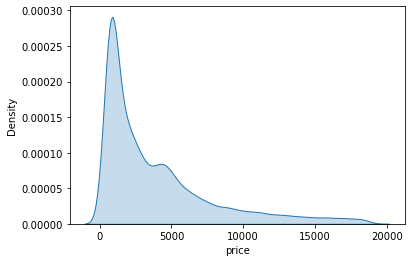

In [28]:
sns.kdeplot(df.price, shade = True);
#kdeplot fonksiyonunu kullanarak yoğunluk grafiği çizgisinin altını boyayarak,
#yoğunluk grafiğini görselleştirip ekrana yazdık.
#density = Yoğunluk

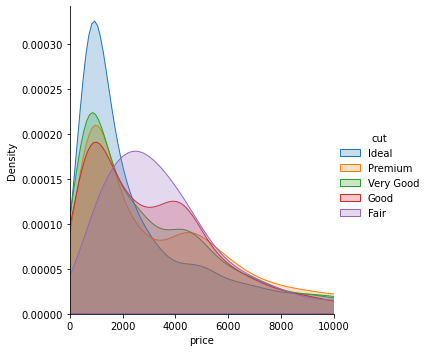

In [38]:
(sns
 .FacetGrid(df,
              hue = "cut",
              height = 5,
              xlim = (0,10000))
 .map(sns.kdeplot,"price",shade = True)
 .add_legend()
);

#yukaırdaki kodun amacı;
#facetgrid birden fazla boyutları görselleşmiş veride bölerek çıktısını verir.
#height argümanı görselleşmiş verinin boyunu ayarlamamıza yardımcı olur.
#xlim değişkeni price sınıfının aralığını ayarlamamıza yardımcı olur.
#map argümanı cut değişkeninin içindeki sınıfları boyut olarak göstermeye yardımcı olur.
#map argümanı sayesinde farklı boyutları grafikte görüp çaprazlamalar hakkında bilgi sahibi olabiliriz.
#add_legend() argümanı ilgili sınıftaki renklerin ne anlama geldiğini kenarda yazdırmamızı sağlar.
#shade = True argümanı çizilen yoğunlul grafiklerinin içinin boyanmasına ve görüntünün kolay seçilmesine yardımcı olur.


In [39]:
#---------------- YUKARIDAKİ GRAFİĞİN ANALİZİ -----------------------
#bu tarz grafikler genel bir veri setinin analizi için temel düzeyde uygundur çünkü,
#bu grafik bir değişkenin içindeki sınıfların yoğunluklarını görselleştirip genel bir çaprazlama konusunda,
#bilgi sahibi olmamızı sağlar.
#bu grafiğe bakınca şunları çıkartabiliriz;
#iki tepeli bir yapı olduğunu görüyoruz bunu şu şekilde yorumlayabiliriz,
# bir yapı, tepe oluşumunda birden değişken vardır.
# 2 üstteki grafiğe bakacak olursak ideal sınıfının veri seti hikyaesinde en lüks olduğunu kafamıza yazmıştık.
# ama çaprazlama yaptığımızda aslında düşük fiyatlarda ideal değişkekninin daha yoğun olduğu gözlemleniyor.
# ön kabulümüz ise ideal olan yani lüks sınıfının fiyat olarak yükseklerde daha yoğun olacağıydı.


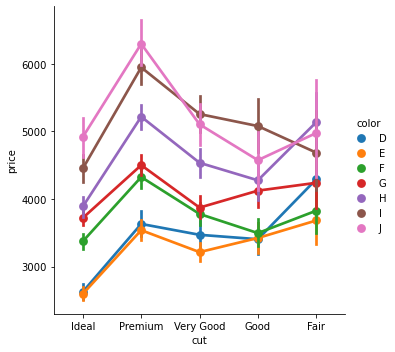

In [41]:
#Aşağıdaki kodda catplot argümanımızı klasik olarak kullandık,
#fakat hue argümanı ile 3.bir boyutu bastırdık,
#ekstra olarak kind argümanını da ekleyip grafiğin,
#nasıl bir tipte olacağını seçtik o tip ise "point" oldu,
#point türü verilerimizi cut sınıfının içindeki değişkenlerin üzerinde,
#büyük ve sade noktalayarak verimizi görselleştirmemize yardımcı olur.

sns.catplot(x = "cut", y = "price", hue = "color", kind = "point", data = df);

In [42]:
#-------------------------GRAFİK ANALİZİ--------------------
#BU GRAFİKTE fiyatın farklı seviyelerinde iki kategorik değişkenin etkilerini görüyoruz.
# x ekseni cut değişkenini ve sınıflarını, y ekseni price değişkenini,
#ve üstündeki renkler ve noktalar color değişkenini temsil etmektedir.
#analize geçtiğimizde ise çubukları görüp direkt standart sapmaların olduğunu görebiliyoruz.
#ideal sınıfının price değişkeni üzerindeki alana yoğunlaşırsak renklerin birbirleri arasındaki dağılım farklılıklarını görebiliyoruz.
# Önemli analizlerden birisi ise color aracılığyla cut değişkenleriyle kesiştiği noktada bir bilgi olabileceğinin habercisidir.
#yukarıda bahsettiğimiz kesişimdeki bilgi haberciliği ideal sınıfındaki turuncu ve mavi renk için çok geçerli değildir çünkü,,
#birbirlerine inanılmaz derecede yakınlardır buna eşit bile diyebiliriz.
# asıl gözlenmesi gereken ideal sınıfındaki pembe ile turuncudur birbirleri arasındaki uzaklıktan yola çıkabiliriz.
# bu yaptığımız manuel analizler aslında birer makine öğrenimidir.
# makine öğrenimi bilgi çıkarabileceği her yerden bilgi çıkarır ve buna göre bir karar destek mekanizması oluşturur.


In [43]:
#------------------ YENİ BİR VERİ SETİ VE HİKYAESİ----------------------
# total_bill : yemeğin fiyatı (bahşiş ve vergiler dahil)
#tip : bağış
#sex : ücreti ödeyen kişinin cinsiyedi (0 = male, 1 = female)
#smoker : grupta sigara içen var mı (0 =no,1=yes)
#day : gün (3=thur,4=fri,5=sat,6=sun)
#time : ne zaman? (0=day,1=night)
#size : grupta kaç kişi var ?

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [4]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [5]:
df["total_bill"].value_counts()

13.42    3
13.81    2
15.98    2
17.92    2
10.07    2
        ..
24.71    1
21.16    1
28.97    1
22.49    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

In [6]:
df["tip"].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
4.34     1
1.56     1
5.20     1
2.60     1
1.75     1
Name: tip, Length: 123, dtype: int64

In [7]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [8]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [9]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [10]:
df["size"].value_counts()

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

In [11]:
#Elimizdeki veri seti ile Boxplot(kutu) grafiği

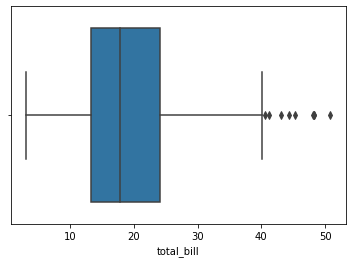

In [12]:
sns.boxplot(x = df["total_bill"]);

In [13]:
#boxplot bize çok değerli bilgiler sunar.
#en soldaki ince çizgi minimum değeri en sağdaki küçük nokta maximum değeri ifade eder.
# kutunun sol kenarı %25 inci değeri
# kutunun orta kısmından aşağı inen çizgi median değerini
# kutunun sağ kenarı ise %75. degeri ifade eder.
# bu yüzdelikd değerleri df.describe.T komutu ile kontrol edebiliriz.
# boxplot komutunun en yardımcı noktası aykırı değerleri tespit etmektir.
# aykırı gözlemleri boxplot görselleştirme tekniği ile tespit edebiliriz.
# sağda olan küçük siyah noktalar aykırı değerlerdir.

In [14]:
# ÇAPRAZLAMALAR
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [15]:
#Hangi günler daha fazla kazanıyoruz?

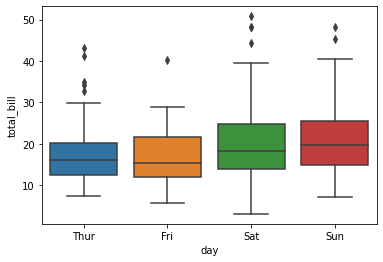

In [16]:
sns.boxplot(x = "day", y = "total_bill",data = df);

In [17]:
#yukarıdaki görselleştirdiğimiz veride günlere göre hangi günler ne kadar kazanmışız,
# ortalama değerlerini max ve min değerlerini günlerin totall bille göre aykırılıklarını görselleştirmiş bulunduk.
#analizimiz sonucu en fazla pazar günü kazanmışız. 



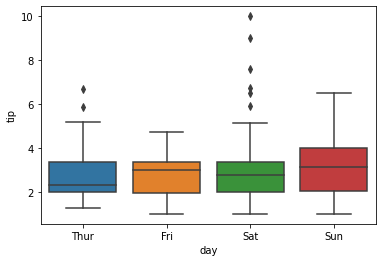

In [18]:
# Hangi gün en çok tip bırakılmış?
sns.boxplot(x = "day",y = "tip", data = df);

In [19]:
#görselleşen veriye göre en yüksek cumartesi günü bırakılmış.

In [20]:
#Hangi gün en fazla insan gelmiş?

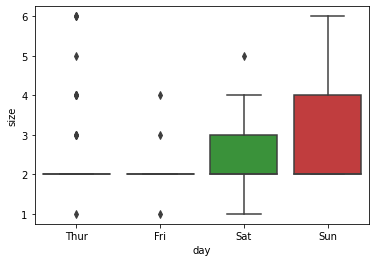

In [21]:
sns.boxplot(x = "day",y = "size", data = df);

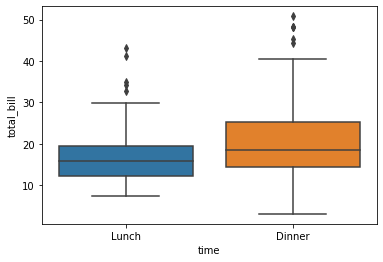

In [22]:
#sabah mı akşam mı daha fazla kazanıyoruz?
sns.boxplot(x = "time", y = "total_bill", data=df);

In [23]:
# görselleşmiş verinin analizi sonucu akşam yemeğinde daha fazla kazandığımız çıkarımını yapabiliyoruz.

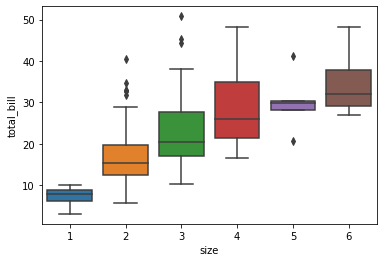

In [24]:
#kişi sayısına göre kazanç analizi
sns.boxplot(x = "size", y = "total_bill", data = df);

In [25]:
# yukarıdaki görselleşmiş verinin analizine göre kişi sayısı arttıkça kazanç da artmış


In [26]:
# günlere göre ve cinsiyete göre cebe giren paranın analizini yapalım.

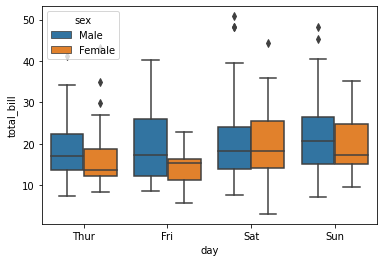

In [27]:
sns.boxplot(x = "day",y = "total_bill",hue = "sex", data =df);

In [28]:
#yukarıdaki grafikten yola çıkarak cumartesi hariç diğer günlerde kadının hesasbı ödediği veriler daha azdır.


In [29]:
#------------------------VİOLİN GRAFİKLERİ---------------------------
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


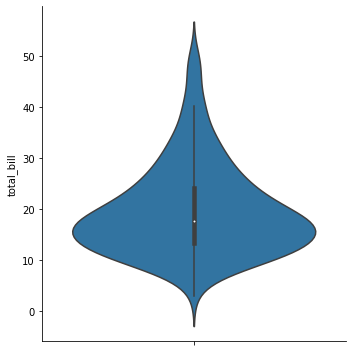

In [31]:
sns.catplot(y = "total_bill", kind = "violin",data = df);

In [32]:
#Bu grafik yoğunluk grafiğinin eksene çevrilmiş halidir.
#bu grafik bize merkezi eğilimi sunan aynı zamanda ortasında boxplot benzeri grafikleri bir bilgi sunar.
#tercihen kullanılan bir grafik türüdür.

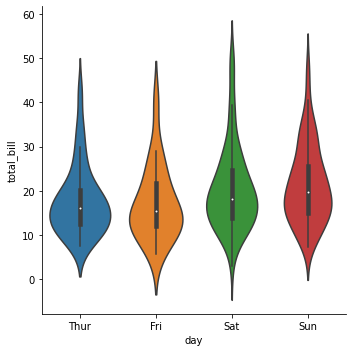

In [34]:
#-------------------------- VİOLİN ÇAPRAZLAMALARI ----------------------
#GÜNLER BOYUTUNU EKLEYELİM
sns.catplot(x = "day",y = "total_bill",kind = "violin",data = df);

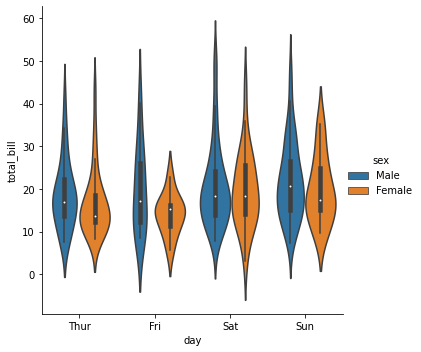

In [36]:
#bir boyut daha ekleyip çaprazlayalım..
#üçüncü bir boyutu ele almanın argümanı hue argümanıdır.

sns.catplot(x = "day",y = "total_bill", hue = "sex",kind = "violin",data = df);

In [4]:
#--------------------------KORELASYON GRAFİĞİNİN OLUŞTURULMASI---------
#Korelasyon değişkenler arasındaki ilişkiyi ifade eden istatistiksel grafiktir.
#SCATTERPLOT = saçılım grafiği demektir.
#bize sayısal değişkenler arasındaki ilişkiyi gösterir.
#iki değişkeni aynı anda değerlendirildikten sonra bize fikir verir.
# ŞU ANA KADAR YAPTIĞIMIZ VERİ İNCELEMELERİNİN DEĞİŞİMLERİ TEK DEĞİŞKENLİ VE ÇAPRAZLAMA,
# BOYUT YAPILAN EKLEMELERDİ AŞAĞIDAKİ BÖLÜMDE İKİ SAYISAL DEĞİŞKENİN BİRLİKTE
# OLUŞTURDUĞU YAPILARI DEĞERLENDİRECEĞİZ.

#----------------------------İKİ FARKLI DEĞİŞKENLİ VERİLERİN İNCELENMESİ-----
# AYNI ANDA İKİ SAYISAL DEĞİŞKENİN ORTAYA ÇIKARDIĞI YAPIYI İNCELEYECEĞİZ.
# YİNE 3. 4. DEĞİŞKENLERİ EKLEYEREK ARKA TARAFTA OLUŞAN BİLGİYE ULAŞACAĞIZ.

import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


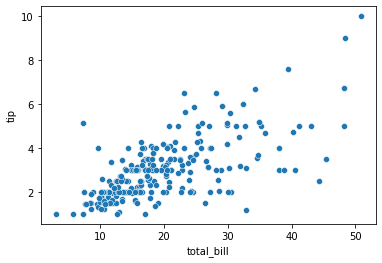

In [41]:
sns.scatterplot(x = "total_bill",y = "tip", data = df);

In [42]:
#Bu saçılım grafiğinden şöyle bir çıkarım yapabiliriz ;
#Ödenen miktar arttıkça bırakılan bahşiş sayısı da artmış.


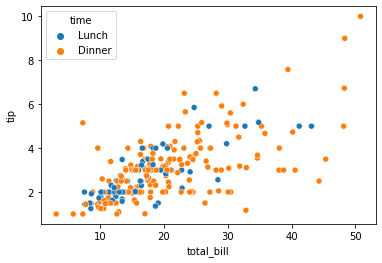

In [46]:
#-----------------------Korelasyonda Çaprazlamalar------------------4
sns.scatterplot(x = "total_bill", y ="tip", hue = "time", data = df);

In [48]:
#Yukarıdaki korelasyon grafiğine time kategorisini de getirerek;
#Akşam yemeğinde daha çok bahşiş bırakıldığı çıkarımı yapılabilir.4


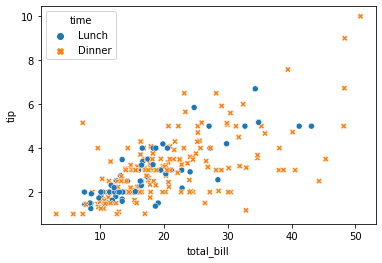

In [49]:
#Grafiksel analizleri gözle görünümünü kolaylaştırmak için style argümanını kullanabiliriz ve diğerlerinden farklı göstermek istediğimiz değişkeni,
# stye = "time" gibi yazarak o değişkenin sembolünü değiştirmesini scatterplot fonksiyonundan isteyebiliriz.

sns.scatterplot(x = "total_bill",y = "tip", hue = "time", style = "time",data =df);

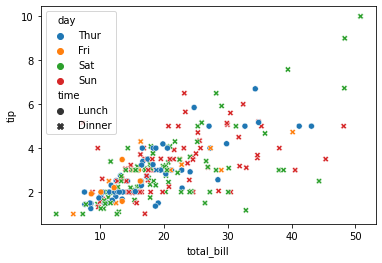

In [52]:
#Aşağıda style argümanınına değişkenlerden farklı bir şey yazdığımız için,
#ekrana çıkardığı grafikte style argümanı içinde olan time değişkenini kullnarak,
# toplam harcama ile bahşiş verilerini günler değişkeniniyle bölerek çıktı verdi.
#günler kırılımın da gördük.
# hem day değişkenini hem de time değişkenini bir arada gördük.

sns.scatterplot(x = "total_bill", y = "tip",hue = "day", style = "time", data = df);

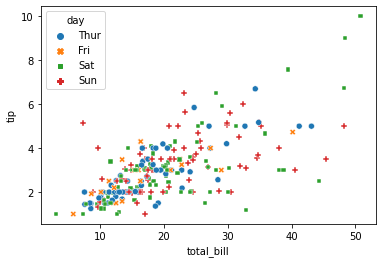

In [54]:
#time yerine day yazıp gözlemleyelim.
# burada ise sadece tek boyut yani günlere göre verilmiş oldu.

sns.scatterplot(x = "total_bill", y = "tip", hue = "day", style = "day",data = df);

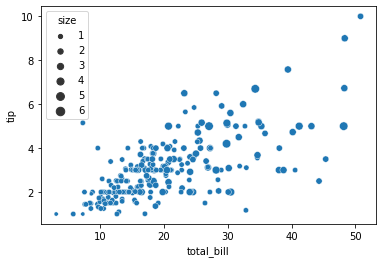

In [55]:
#PEKİ BİR SÜREKLİ DEĞİŞKENİ İŞİN İÇİNE KATARSAK NE OLUR?
sns.scatterplot(x = "total_bill", y = "tip", size = "size",data = df);

#size masalarda oturan yemek yiyen grubun içinde kaç kişi olduğunu söylerdi.
#yani bir sayısal değişkendi.
# sayısal bir sürekli değişkeni size argümanı ile ekledik.

In [56]:
#yukarıdaki grafikte boyutlar ekrana yazdırıldı küçükten büyüğe olarak grup sayıları ve,
# şekil büyüklükleri gördüğünüz üzere artıyor.

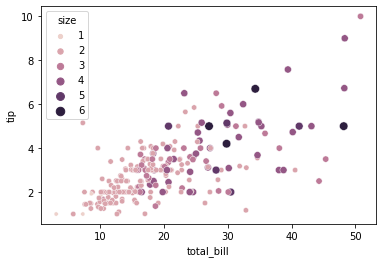

In [57]:
#EĞER HUE ARGÜMANINI KULLANARAK RENKLENDİRME YAPARSAK ;
sns.scatterplot(x = "total_bill", y= "tip", hue = "size", size = "size", data =df);
#DAHA ANLAŞILABİLİR BİR GRAFİK ÇIKTISI OLUYOR.

In [2]:
#----------DOĞRUSAL İLİŞKİNİN GÖSTERİLMESİ---------------------
#Saçılım aracılığı ile sunulan görselleşmiş verileri doğrusal aracıyla da gösterelim.


import seaborn as sns
import matplotlib.pyplot as plt

#lmplot fonkisoynunu kullnacağız lm = lineer model

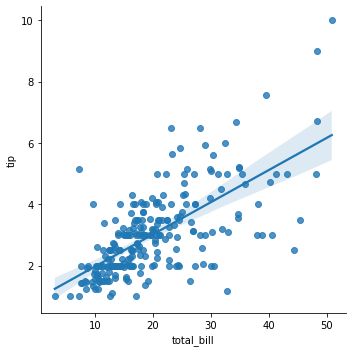

In [5]:
sns.lmplot(x = "total_bill", y ="tip" , data=df);

In [6]:
#doğrusal grafiğin etrafındaki açık mavi alan sapmaları ifade etmektedir.
# verilerimiz doğrusal grafikten ne kadar uzaklaşırsa açık mavi alan da bir o kadar artış gösterip sapmayı ifade eder.


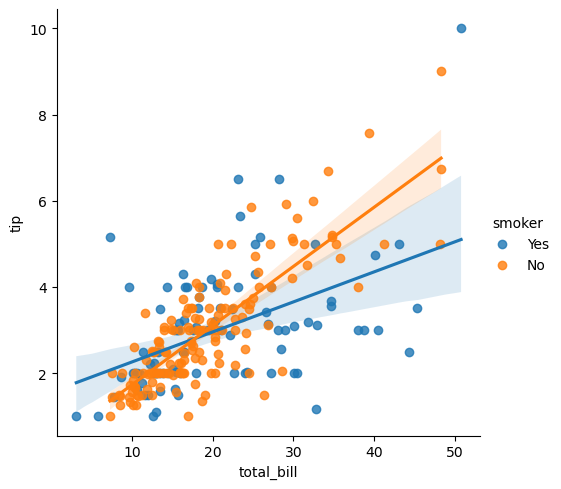

In [8]:
#Lineer Modeli bir de çaprazlama işlemiyle kullanalım.
sns.lmplot(x  ="total_bill", y = "tip", hue = "smoker", data =df);


In [9]:
#bu grafikten şöyle bir çıkarım yapalım.
#sigara içmeyen insanların ödedikleri miktar arttıkça bıraktıkları bahşiş şiddetli bir şekilde artış göstermiştir.
#Sigara içen insanların ödediği miktar arttıkça bıraktığı bahşiş sayısının içmeyenlere göre daha az olduğunu gözlemliyoruz.


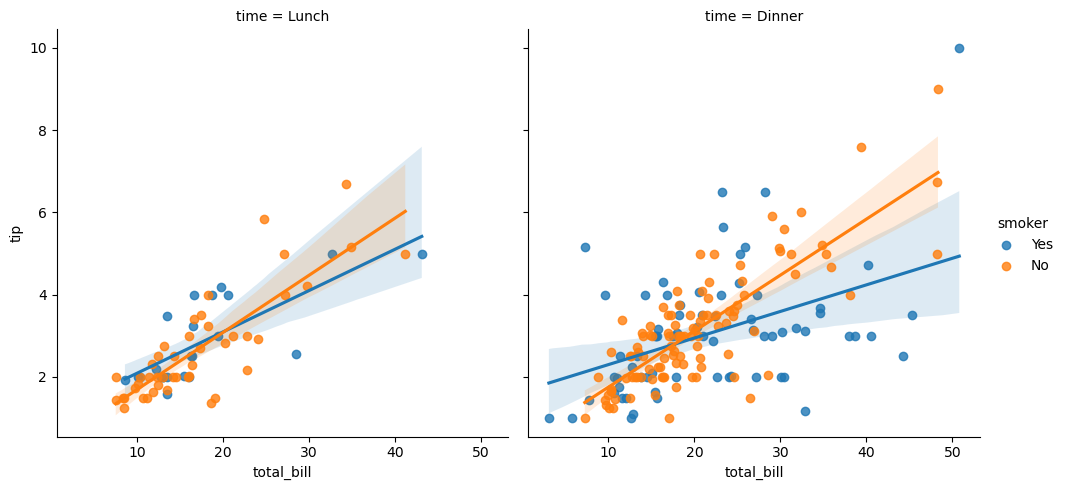

In [10]:
#Bir de col argümanı kullnarak bir değişken daha ekleyip analiz edelim.
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = df);

In [11]:
#col argümanı eklediği kategoriyi bölerek grafiklere ayrı ayrı dökmeye yarar yukarıda da görüldüğü gibi.
#time argümanı ile yaptığımız analizde sigara içmeyenlerin hesap ücreti arttıkça bıraktığı bahişi sayısı akşam yemeğinde öğlene göre daha fazla olduğudur.
#bu analizi sigara içenlerde yapmak istersek öğlen yemeğindeki sigara içenlerin hesap ücreti arttıkça bıraktığı bahşiş sayısı akşam yemeğindeki sigara içenlere göre daha fazladır.


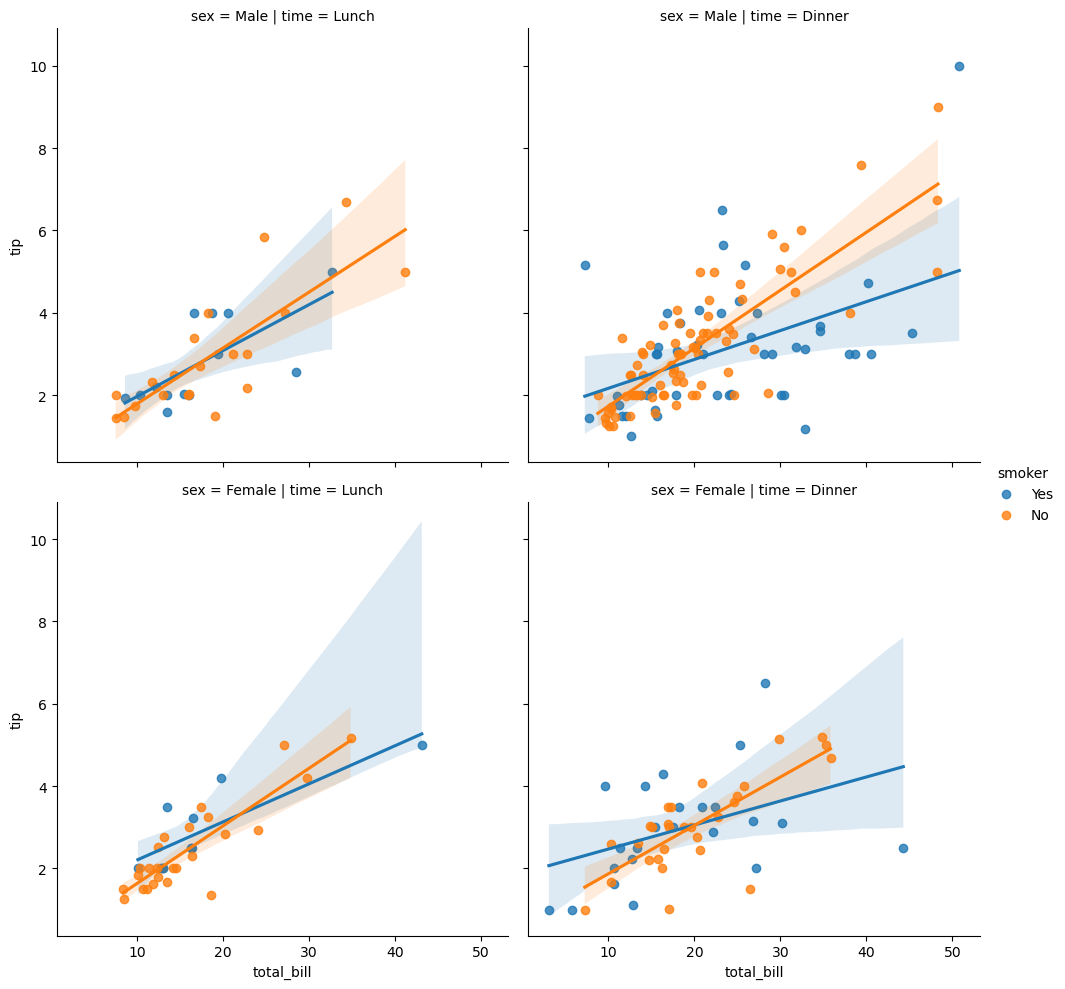

In [14]:
#BiR BOYUT DAHA EKLEYELİM. bunu ROW argümanı ile yaptık.
sns.lmplot(x = "total_bill", y = "tip", hue = "smoker", col = "time",row = "sex",data = df);
#row argümanı satırlara göre kategorileri ayırır. Tıpkı aşağıdaki gibi..
#satırlara göre cinsiyeti , sütunlara göre time kategorisini okumamız gerekiyor.
#daha da açık konuşmak gerekirse cinsiyet erkek olup öğlen olunca ne olmuş , cinsiyet erkek olunca akşam ne olmuş şeklinde...

In [15]:
#--------------------SCATTERPLOT MATRİSLERİ-------------------------
import seaborn as sns
#YENİ BİR VERİ SETİ TANIMLAYALIM...
#Bu veri setinin hikayesi dünyadaki çiçek türlerinin özelliklerini içermesi ve çok ünlü olmasıdır.
#veri setinin içerisinde yapraklarıyla ilgili uzunluk genişlik vs.
iris = sns.load_dataset("iris")
df = iris.copy()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [20]:
#data type'a bakarak float değerlerini gördük yani sayısal değişkenler içeren bir veri seti çıkarımı yapıyoruz.
#bir tane kategorik değişkenimiz bulunuyor ve nominal tipte yani sınıfları arasında değişkenlik yok.

In [23]:
df.shape
#150 gözlem ve 5 değişkenden oluşuyor.

(150, 5)

In [24]:
df.describe()
#verileri genel bir inceleme adına çıktısına bakalım.

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


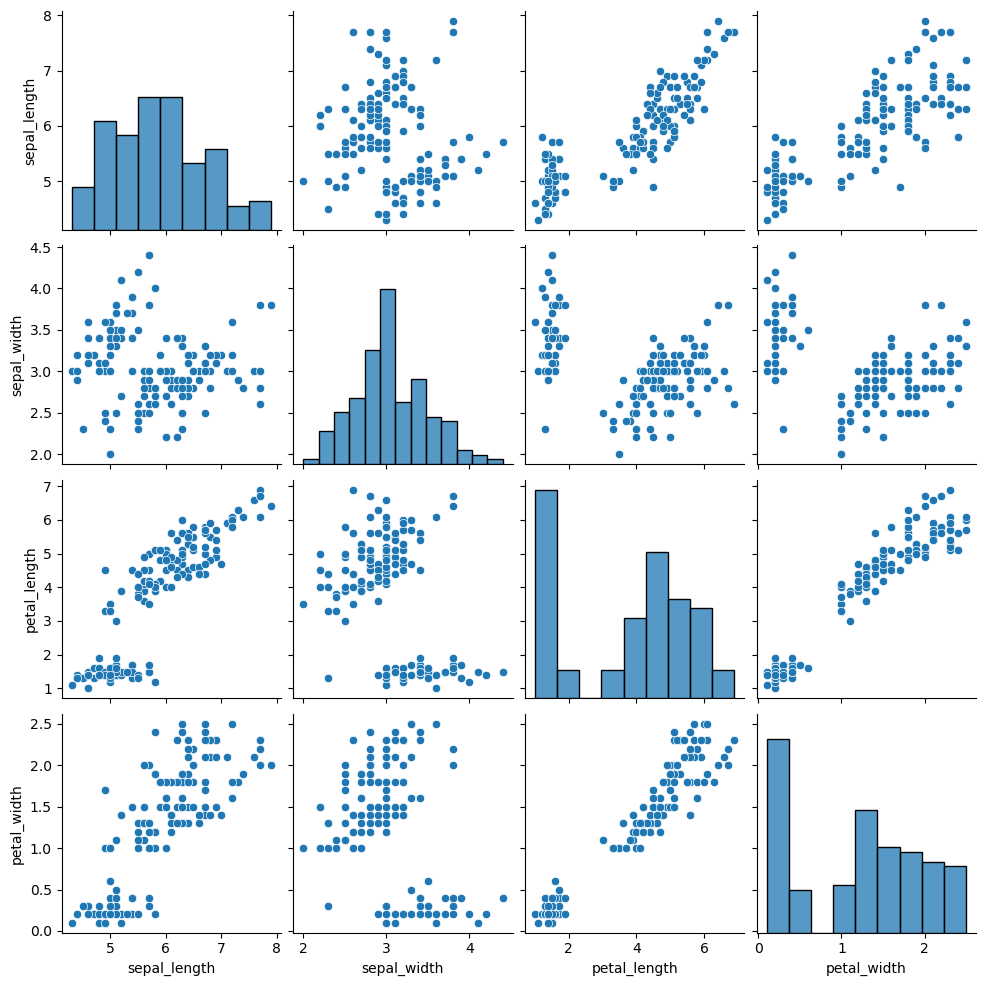

In [25]:
#grafiklere dökmeye başlayalım
sns.pairplot(df);

In [26]:
#görselde veri setinde olan 4 tane değişkenin birbirleriyle olan ilişkileri görselleşmiştir.
#bu görselin bize sunduğu iki bilgi mevcut;
# 1.si eksende olan dikdörtgen grafikler bunlar bize değişkenlerin veri setindeki dağılımlarını ifade ediyor.
#1. verilen bilgiyi daha açmak istersen sepal_lenght değişkeninin veri setindeki dağılımını görselleştirmiş olduk bunu kesişimle ilişkilendirmemiz gerekli.
# 2.si ise eksenlerde yapılacak kesişimler ile değişkenlerin sunulmasıdır.
# 2. verilen bilgiye açıklık getirmek istersek sol alt kısma yoğunlaşıp petal_width ve sepal_lenght değişkenlerinin ilişkisi görselleştirilmiş.
#---------------------------------------------------------------------------------------------------------------
#!!!!!!!!! scatterplot ile ilgili kritik bilgilerden birisi oluşan grafik bir TOZ BULUTU şeklindeyse ya da oluşan grafiğin yapısal bir formu yoksa veriler arasında bir ilişkinin OLMADIĞI anlamına gelir.
#!!!!!!!!! diğer önemli bilgi ise oluşturulan scatterplot içerisinde gözlem noktaları incelendiğinde bunlar eğer birbirinden farklı köşelerde kümeleniyorsa sık sık vurgulanan ÇAPRAZLAMA durumuyla gözlemleyecek olduğumuz bu farklı farklı kümeleri ifade eden bazı alt gruplar vardır VE BUNLARIN GÖZ ÖNÜNDE BULUNDURULMASI GEREKİR.


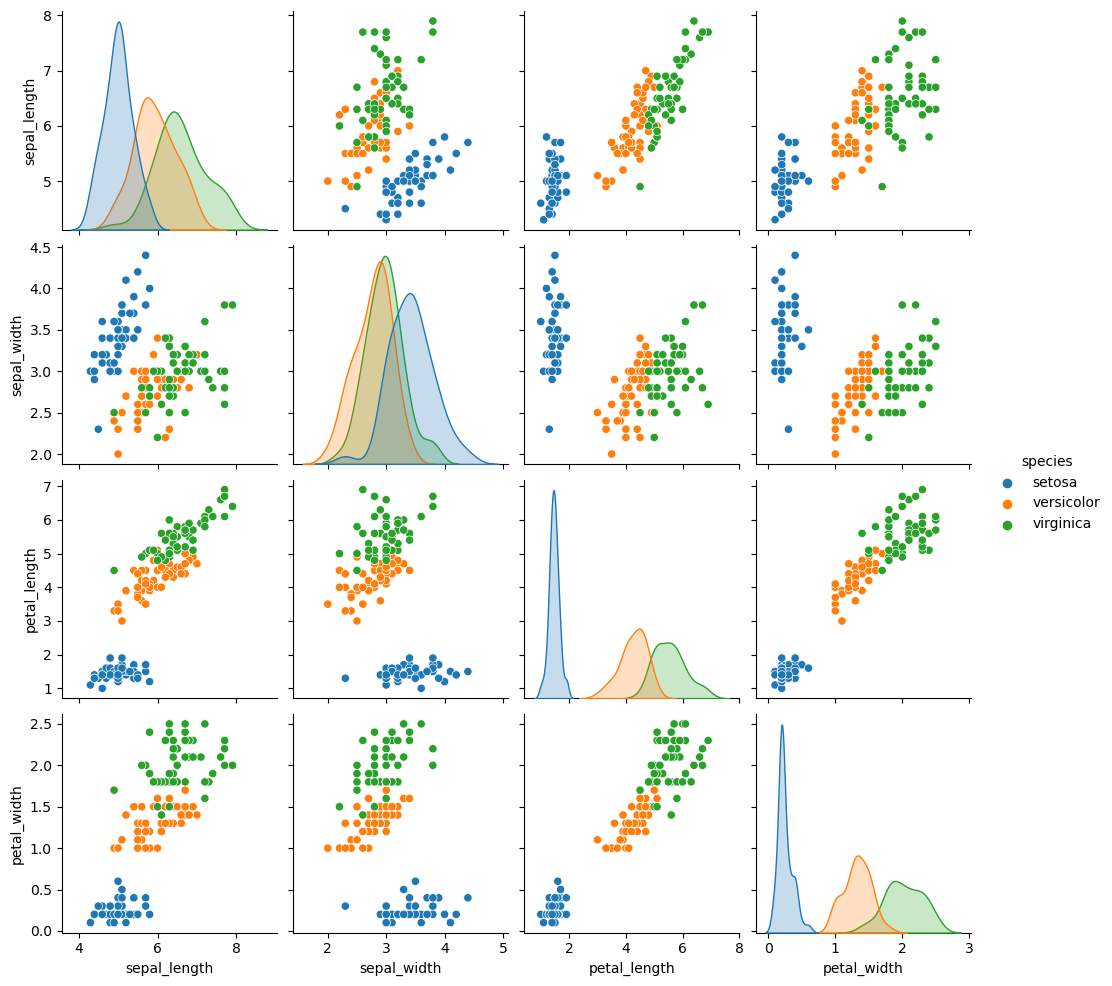

In [28]:
sns.pairplot(df, hue = "species");

In [29]:
#yukarıda scatterplot ile verilen kritik bilgilerin ikincisinde ifade edilen; " eğer farklı farklı bölgelerde kümelenen yapılar varsa bunları çaprazlama ile göz önüne almak gerekir" yorumunu çok güzel görselleştiren bir görüntü yukarıda verilmiştir.
#Görselde farklı yapılanmalara dikkat çekilmiştir.
#ÇAPRAZLAMA HAYAT KURTARIR.

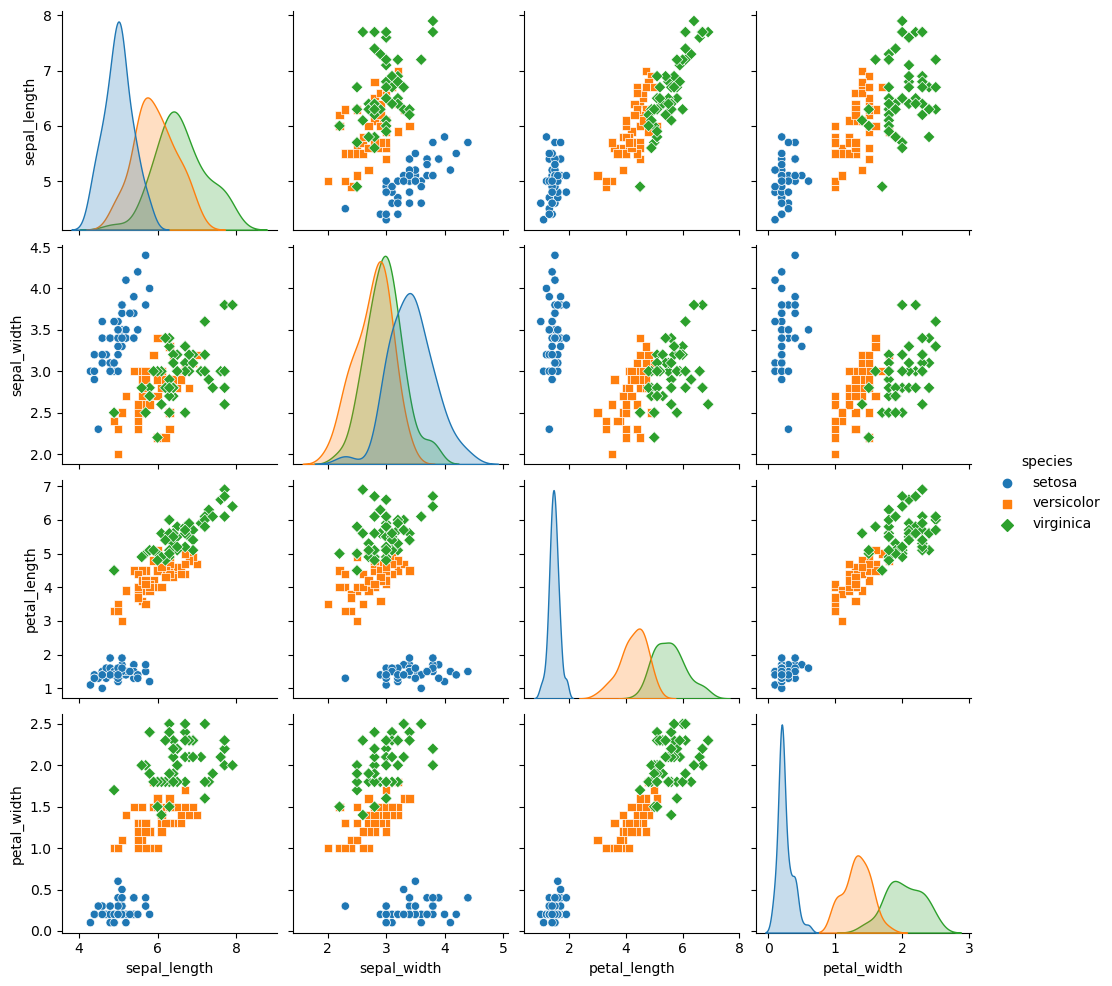

In [30]:
sns.pairplot(df, hue = "species", markers = ["o","s","D"]);


In [31]:
#Pairplot içerisinde bulunan bazı sembolleri simgeleyen harfleri kullnarak gösterim şeklindeki noktaları farklı şekillerle ifade edebiliriz.

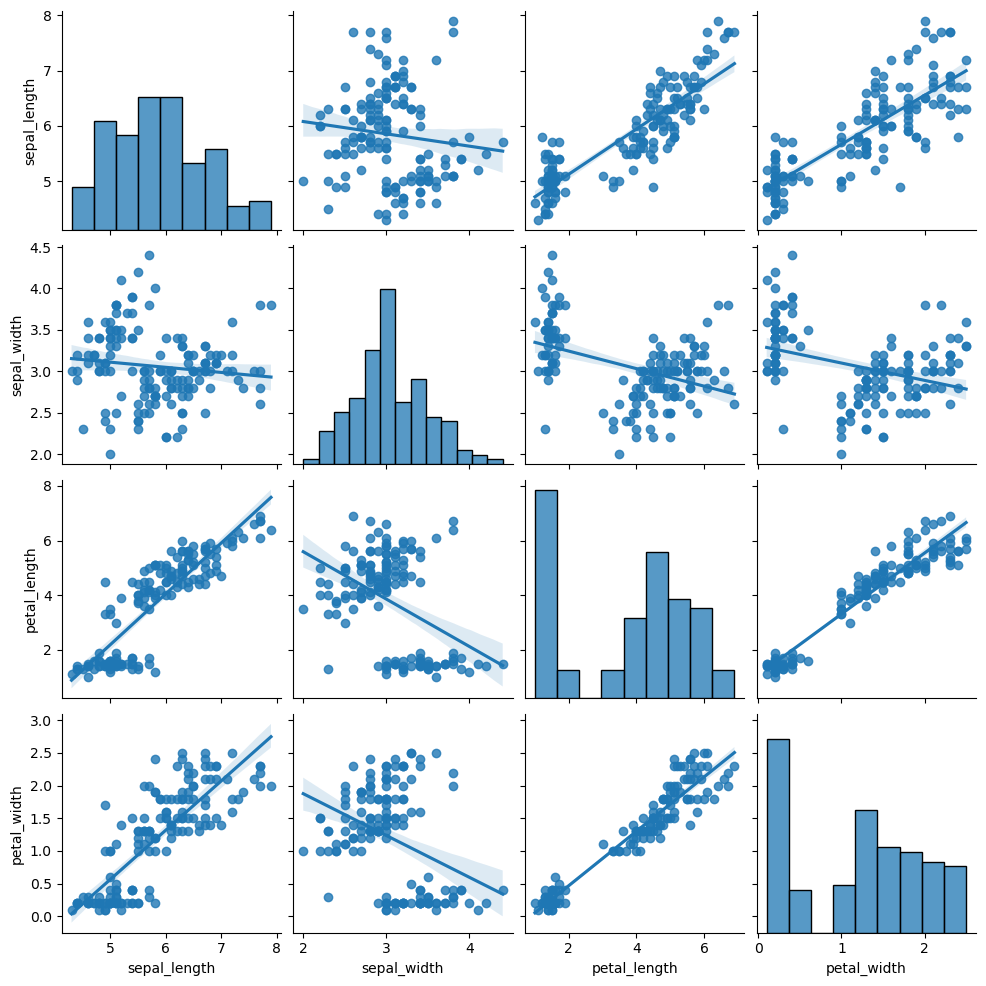

In [33]:
#--------------------------GAFİĞE DOĞRU EKLEME İŞLEMİ------------------
sns.pairplot(df, kind = "reg");

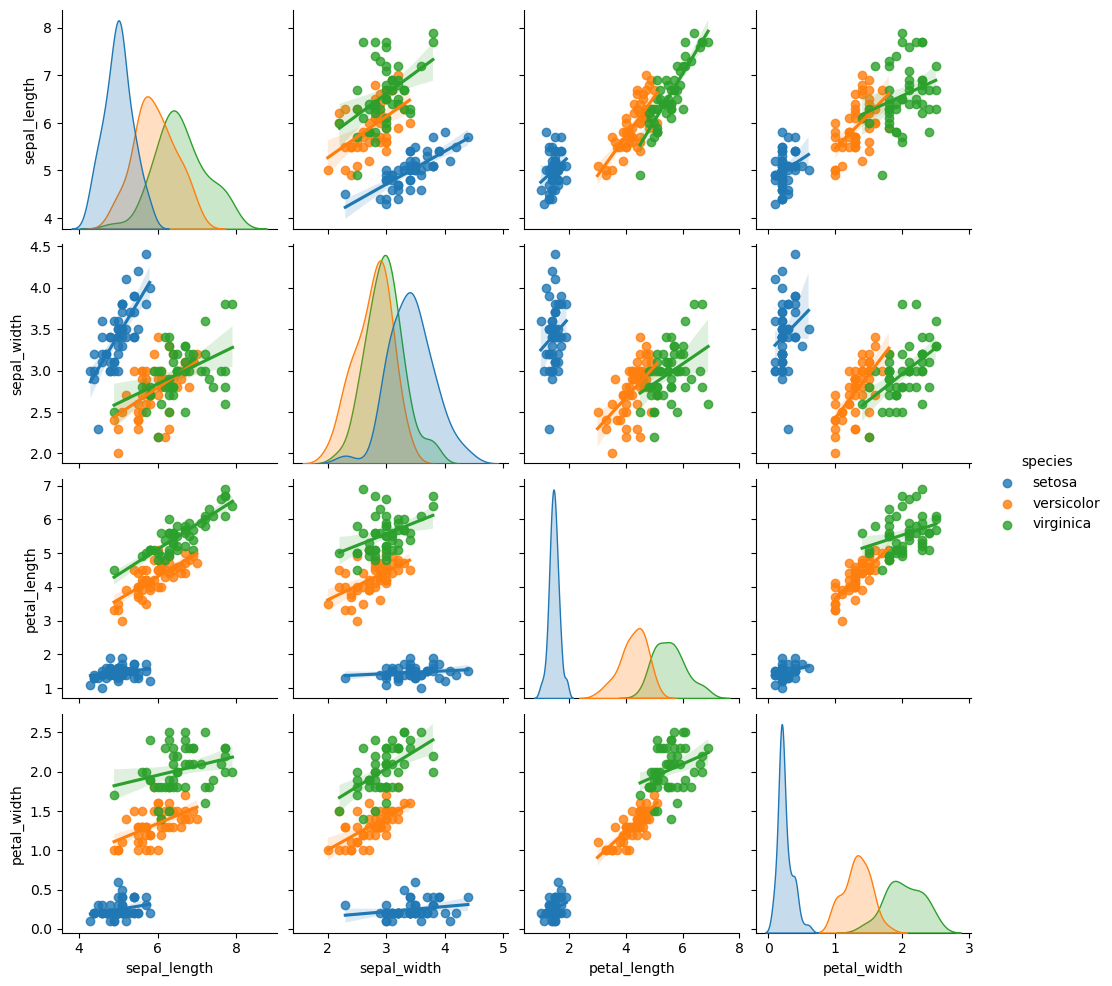

In [34]:
#DAHA DA DETAYLANDIRMAK İSTERSEK;
sns.pairplot(df, hue = "species", kind = "reg");

In [36]:
#1.sütun 3.satıra yoğunlaşırsak petal_lenght ve sepal_lenght değişkenlerinin turuncu ve yeşil türleri arasında şiddetli pozitif bir korelasyon olduğunu gözlemleyebiliriz.
#fakat setosa ile aralarında bir ilişki olmadığını, eğiminin neredeyse 0 olduğunu gözlemleyebiliyoruz.

In [52]:
#----------------------------------ISI HARİTASI (HEATMAP)---------------
#ISI HARİTASI elimizdeki değişkenleri biraz daha yapısal anlamda daha geniş pencereden bakmamızı sağlayan bir fonksiyondur.
#VERİ SETLERİNDE İÇİNDE ZAMAN SERİSİ YANİ AY YILLARI İÇEREN BU DÖNEMLERE KARŞILIK KENDİ İÇİNDE TEKRAR EDEN VERİLERE SAHİP OLUNDUĞUNDA HEATMAP BİRÇOK BİLGİ ÇIKARIR.
#ÇOK SINIFLI KATEGORİK DEĞİŞKEN VE BUNU BELİRLİ BİR SAYISAL DEĞİŞKEN AÇISINDAN GÖRSELLEŞTİRMEKTE ÇOK İŞE YARAR.
#yeni bir veri seti tanımlayalım bu veri seti hikayemiz uçuş verileridir.
import seaborn as sns
flights = sns.load_dataset("flights")
df = flights.copy()
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [53]:
#veri setimizde yıllara ve aylara göre uçuş sayıları vardır.
df.dtypes
#veri setimizde year ve passangerlar sayısal monthlar ise kategorik değişkendir.

year             int64
month         category
passengers       int64
dtype: object

In [54]:
df.shape

(144, 3)

In [55]:
#144 gözlem birimi 3 değişkenden oluşuyor.

In [56]:
df.describe

<bound method NDFrame.describe of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]>

In [57]:
df["passengers"].describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: passengers, dtype: float64

In [58]:
#biraz daha okunabilir bir formata getirelim.
#pivot table aracılığı ile bu işlemi yapalım.
df = df.pivot("month", "year", "passengers");
#yukarıda month x eksenini year y eksenini ve passengers kesişimlerinde bulunacak olan sürekli değişkeni ifade eder.
#pivot işlemi sonrası veriyi aşağıda gösterelim.

In [59]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


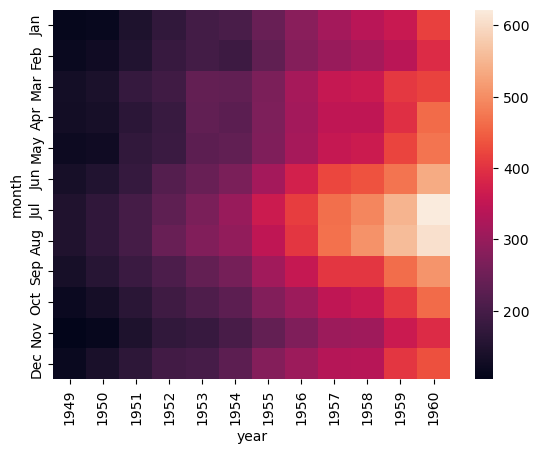

In [60]:
sns.heatmap(df);

In [61]:
#HEATMAP yapı saptamak problemlerinde çok güzel işlev görebilen fonksiyondur.
#grafik analizi yaparsak açık renkler 600 ve üstü koyuya doğru gidiş 200 ve altına kadar gitmektedir.
#ifade ettiği anlamlar yıllar bazında sağa doğru gittikçe uçuş sayıları artmaya başladığını analiz edebiliriz.
#yıllar bazında aylara göre trendlere erişebiliriz yıllara göre en çok agustos ve temmuzda en çok uçuş zamanla artmış.
#hem yıllar geçtikçe ve yaz ayarlarına gelindikçe yolcu sayılarında bir artış söz konusudur.


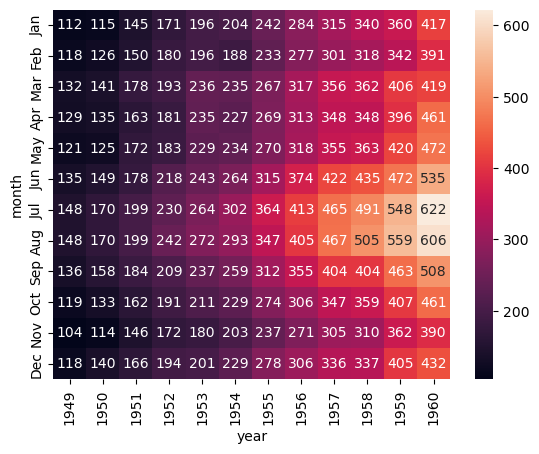

In [65]:
#HEATMAP ile alakalı birkaç görsel biçimlendirme yapmak istersek;
sns.heatmap(df, annot = True, fmt = "d");
#verileri sayılara dökmek için annot argümanını ekledik.
#fmt argümanı karışıklığı gidirmeye yarar ve bir düzene sokar.

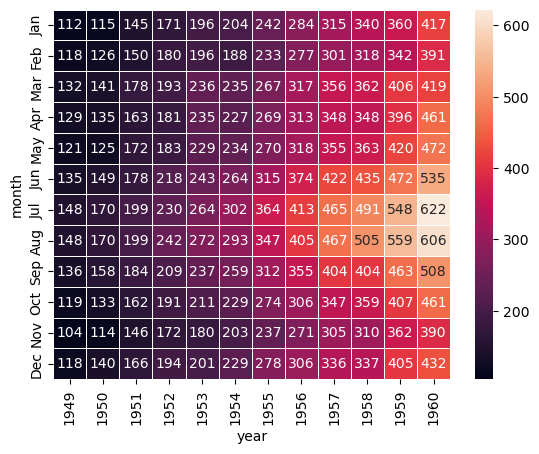

In [67]:
sns.heatmap(df, annot = True, fmt = "d", linewidths = 0.5);
#okunması kolay olsun diye linewidths argümanı ile aralarında 0.5 mm aralıkla yazmasını istedik ve aşağıdaki çıktıyı aldık.

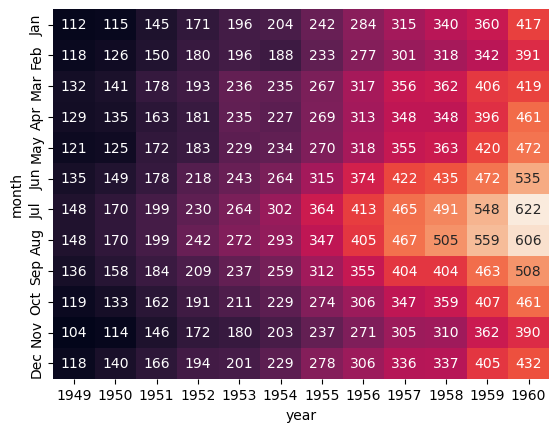

In [68]:
#eğer sağdaki sayı skalasını belirten barı silmek istersek. Aşağıdaki komutu yazabiliriz.
sns.heatmap(df, annot = True , fmt = "d", cbar = False);

In [69]:
#------------------ÇİZGİ GRAFİKLERİ-------------------------
import seaborn as sns
fmri = sns.load_dataset("fmri")
df = fmri.copy()
df.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [70]:
#VERİ SETİMİZİN HİKYAESİ
#bu veri seti beyine bağlanan bir cihaz aracalığı ile toplanan sinyali ifade eden bir veri setidir.
#subject beynine bağlantı yapılan insanları temsil ediyor.
# timepoint zaman noktalarını ifade ediyor.
# event birbirinden farklı olayları ifade ediyor.
# region sinyalin toplandığı bölgeyi ifade ediyor.
# signal ise toplanan sinyalleri ifade ediyor.
#yapısal kaynaklardan türeyen bir veri setidir.



In [72]:
df.shape

(1064, 5)

In [73]:
#1064 gözlem birimi  ve 5 değişkene sahiptir.

In [74]:
#zaman noktasına göre signali incelemeye alalım ve çaprazlama işlemleri ile birlikte diğer değişkenleri boyut olarak veri setine ekleyelim.


In [76]:
#ilk başta sayısal değişken ve kesikli bir değişken olan timepointi betimsel olarak inceleyelim.

df["timepoint"].describe()

count    1064.000000
mean        9.000000
std         5.479801
min         0.000000
25%         4.000000
50%         9.000000
75%        14.000000
max        18.000000
Name: timepoint, dtype: float64

In [79]:
#görüldüğü üzere aralarda std hariç olarak kesirli bir sayı yok yani mutlak değerlere sahip ve bu da kesikli olduğu anlamına gelir.
#eğer istenirse bunu kategorik bir değişkenmişçesine alabiliriz.


count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [80]:
df["signal"].describe()

count    1064.000000
mean        0.003540
std         0.093930
min        -0.255486
25%        -0.046070
50%        -0.013653
75%         0.024293
max         0.564985
Name: signal, dtype: float64

In [81]:
#standart sapma ciddi yüksek.fakat bu ölçeğe göre std nin yüksek olması gayet normal karşılanabilir.

In [83]:
#bu tarz veri setlerinde ilk olarak TEKİLLİK aranır ve unique incelenir.
#subjectler tekil mi çoklamış mı her birisi için timepoint değeri mi var tarzında sorulara cevap bulmak gerekir.
#AKILLARA GELEN İLK SORULARDAN BİRİNİ CEVAPLAYALIM O SORU İSE;
#Her bir zaman noktasında acaba eşit sinyal mi var?
df.groupby("timepoint")["signal"].count()

timepoint
0     56
1     56
2     56
3     56
4     56
5     56
6     56
7     56
8     56
9     56
10    56
11    56
12    56
13    56
14    56
15    56
16    56
17    56
18    56
Name: signal, dtype: int64

In [85]:
#YANİ HER BİR ZAMAN NOKTASINA GÖRE EŞİT SİNYAL TOPLANMIŞ SORUNUN CEVABI EVET.
#VERİ SETİMİZ MEKANİK BİR VERİ SETİDİR.

In [87]:
df.groupby("signal").count()

,subject,timepoint,event,region
signal,,,,
-0.255486,1,1,1,1
-0.238474,1,1,1,1
-0.224351,1,1,1,1
-0.181241,1,1,1,1
-0.178510,1,1,1,1
...,...,...,...,...
0.455575,1,1,1,1
0.460896,1,1,1,1
0.476055,1,1,1,1


In [89]:
df.groupby("timepoint")["signal"].describe()
#bu işlem timepointle sinyal gruplandırılmasının açıklamasının çıktısını ekrana yazdırır.

,count,mean,std,min,25%,50%,75%,max
timepoint,,,,,,,,
0,56.0,-0.016662,0.028326,-0.064454,-0.039169,-0.018382,0.003539,0.074399
1,56.0,-0.025002,0.030641,-0.082174,-0.046299,-0.024533,-0.005388,0.063558
2,56.0,-0.012873,0.035440,-0.110565,-0.034944,-0.013183,0.009318,0.077277
3,56.0,0.034446,0.058260,-0.089708,-0.001157,0.028430,0.061840,0.185581
4,56.0,0.098194,0.092838,-0.046347,0.030912,0.070166,0.144911,0.346775
5,56.0,0.137725,0.123353,-0.017946,0.042762,0.096535,0.211638,0.476055
6,56.0,0.127515,0.137332,-0.054405,0.022409,0.068850,0.218919,0.564985
7,56.0,0.075660,0.129704,-0.108222,-0.016252,0.032486,0.144781,0.494787
8,56.0,0.013420,0.104216,-0.181241,-0.049453,-0.012834,0.030396,0.337143


In [90]:
#genel bir grafik incelemsi yapıldığında standart sapmalar birbirine ne kadar yakın dursa da bazı değerler birbirinden çok çok farklıdır.
#devam ederek daha da veri setimizi anlamaya çalışalım..

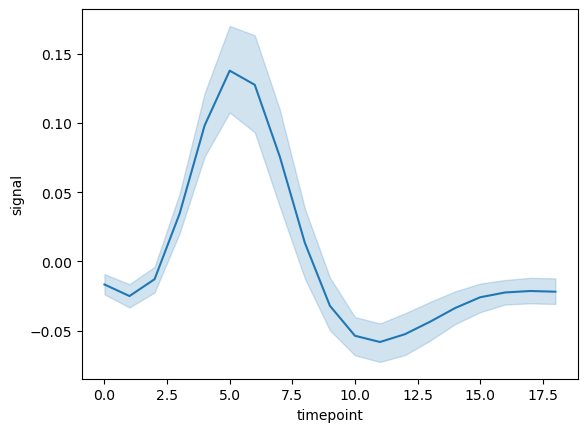

In [91]:
#---------------------- ÇİZGİ GRAFİĞİMİZİ OLUŞTURALIM-----------
sns.lineplot(x = "timepoint", y = "signal", data = df);

In [92]:
#bu grafik zaman noktalarına göre sinyallerin artış ve azalışını görselleştirmiştir.,
#açık mavi olan kısımlar sapma değerlerini ifade eder. "+,-"" şeklinde düşünülebilir.
#ve bu açık mavi alanın ortalaması ortadaki çizgiyi ifade der.
#sapmayı , standart sapmayı ifade eder.
#her bir zaman noktasında 56 değer bulunmaktadır.


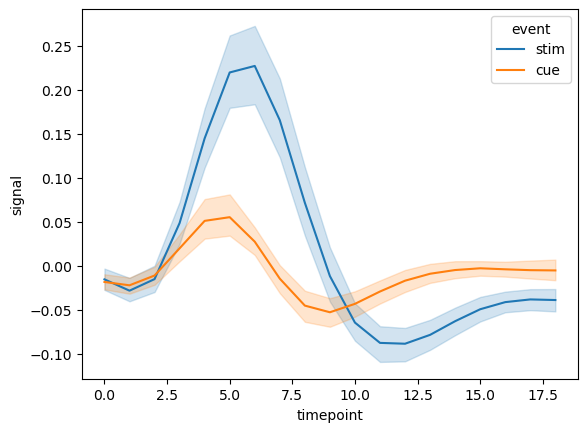

In [93]:
# hue argümanı ile üçüncü kategorik değişkenimizi ekleyelim.
sns.lineplot(x = "timepoint", y = "signal", hue = "event", data = df);

In [94]:
#event kategorisindeki stim ve cue bir üstteki 2 boyutu olan grafikte yokken bir anlam ifade etmiyordu.
# şu an bu pik noktalarını etkilediğini görebiliyoruz ve YAPISAL OLAN VERİ SETİMİZ daha anlamlı hale geldi.

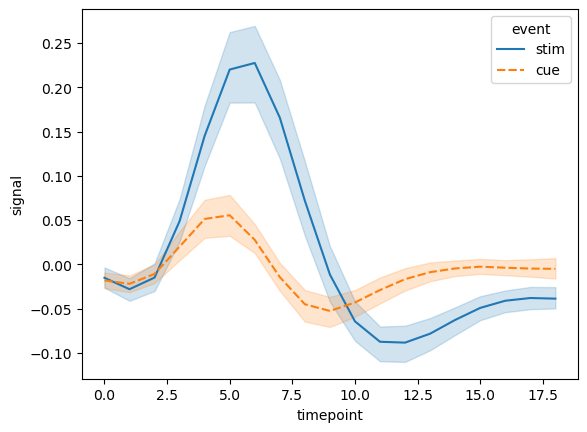

In [95]:
#biraz daha verimizi betimsel biçimlendirmeye katarsak aşağıdaki gibi yazabiliriz.
sns.lineplot(x = "timepoint", y = "signal", hue = "event", style = "event",data = df);

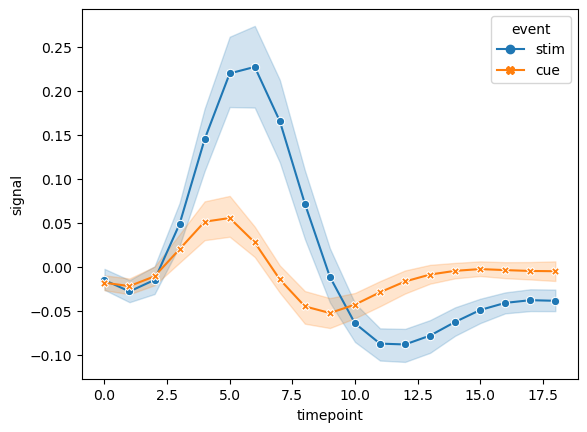

In [100]:
#Grafiklerin ortasından geçen çizgi ortalamayı ifade ediyordu, bunları biraz daha belirginleştirmek istersek aşağıdaki kodu yazabiliriz.
sns.lineplot(x = "timepoint", 
             y ="signal", 
             hue = "event", 
             style = "event",
             markers = True,
             dashes = False,
             data = df);
#markers noktalama ile ifade etmekte kullanılıyordu bunu görmüştük dashes kısmı geldi bu ise ortadaki noktayı biçimler.


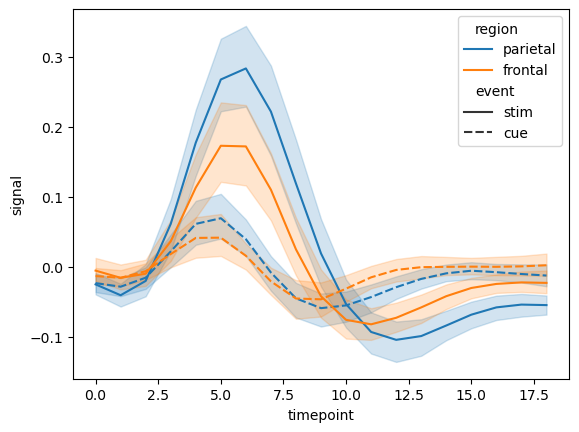

In [101]:
sns.lineplot(x = "timepoint", 
             y ="signal", 
             hue = "region", 
             style = "event",
             data = df);
#yeni bir boyut eklendiğinde grafiğin bize açıklanabilirliği daha fazla artmıştır.

#              PYTHON ile Veri Manipülasyonu

In [1]:
a = [1,2,3,4]
b = [2,3,4,5]


In [5]:
ab = []
for i in range(0,len(a)):
    ab.append(a[i]*b[i])
    
ab
#normal şartlarda bir listeyi çarpmak için kısa bir for döngüsü yazardık bu işlemi bir de numpy kütüphanesi ile yapalım.

[2, 6, 12, 20]

In [6]:
import numpy as np
#aşağıda bir numpy arrayi oluşturduk array numpy içinde bir veri tiplemesidir.(Tıpkı tuple ve sözlükler gibi)

In [7]:
a = np.array([1,2,3,4])
b = np.array([2,3,4,5])

In [8]:
a * b

array([ 2,  6, 12, 20])

In [9]:
#gördüğünüz üzere karmaşık olan for döngüsünden çıkıp array ile kolaylıkla listeleri çarpıp tek bir liste içinde gösterdik.

## NUMPY Arrayi Oluşturmak

In [10]:
import numpy as np
np.array([1,2,3,4,5])

array([1, 2, 3, 4, 5])

In [11]:
a = np.array([1,2,3,4,5])

In [12]:
type(a)

numpy.ndarray

In [13]:
np.array([3.14,4,2,13])

array([ 3.14,  4.  ,  2.  , 13.  ])

In [14]:
#gördüğünüz üzere ondalıklı sayılar ile tam sayıları yan yana bir array içine eklediğimizde hepsini ondalıklık sayıya çevirdi
#bu durumun sebebi arrayin sabit bir tipe zorladığı olduğudur.

In [15]:
#istersek dtype argümanı ile array içindeki verileri istediğimiz formata çevirebiliriz.
np.array([1,2,34.452,34,5.435], dtype = "int")

array([ 1,  2, 34, 34,  5])

In [16]:
#yukarıda görüldüğü gibi array içindeki verilerimiz integer formatına dönüştü.

#  Sıfırdan Array Oluşturma

In [18]:
np.zeros(10, dtype = "int")

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#yukarıda sıfırlardan oluşan 10 adet int formatında liste oluşturduk.
#Kullanılan argüman isminden de belli olduğu gibi np.zeros
#ilk indeks kaç tane olacağı ikinci indeks opsiyonel olmakla birlikte değişebilir.

In [22]:
np.ones((3,5), dtype = "int")

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [ ]:
#yukarıda 1 lerden oluşan bir array oluşturduk.
#isminde de belli olduğu gibi ones argümanını kullandık.
#fakat ((3,5)) diyerek 3 satır 5 sütundan oluşmasını istedik.
#dtype = "int" ekleyerek de verilerin 3 satır 5 sütundan oluşan birler verisi oluşumunu sağladık.

In [23]:
np.full((3,5), 3)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [25]:
#yukarıdaki full argümanı ile ilk indekste parantez içine kaç satır kaç sütundan oluşacağını belirtip,
#diğer indekse ise bu satır ve sütunların hangi sayıdan oluşacağını belirtip çıktımızı alıyoruz.

In [26]:
np.arange(0,31,3)

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30])

In [27]:
#yukarıdaki arange argümanı ilk indekste kaçtan başlayacığını,
#ikinci indekste hangi sayıya kadar devam edeceğini,
#üçüncü indekste ise kaçar kaçar artacağını belirtir.

In [29]:
np.linspace(0,1,10)
#yukarıdaki linspace argümanı birinci indekste belirttiğimiz 0 dan başlayıp,
#ikinci indekste belirttiğimize kadar yani 1 e kadar 10 tane sayı oluşturma işlemini yapar.
#son indekste de 0 ile 1 arasında kaç sayının olacağını belirtiyoruz.

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [30]:
np.random.normal(10,4,(3,4))

array([[ 7.66249205,  7.47077181, 10.26743916, 16.61670459],
       [ 5.84874629, 12.93569462, 10.19174151,  5.47260276],
       [14.18185468, 12.6066685 , 12.37564642,  0.94777803]])

In [31]:
#yukarıdaki random.normal argümanının içinde olan ilk indeks ortalama,
#ikinci indeks standart sapmayı ve son indekste belirtilmiş olan (3,4) satır ve sütunları ifade eder.
#bu argüman sayesinde istenilen formatta bir array oluşturur.

## NOT : Tek boyutlu array vektör, iki boyutlu array matristir.

In [33]:
#İnteger değerlerden rastgele oluşturulmuş bir veri istersek;
np.random.randint(0,10,(3,3)) 
#çıktısından da görüldüğü üzere 3 e 3'lük bir matris oluştu ve değerleri hem integer hem de,
#0-10 arasındaki değerleri içeriyor.

array([[6, 1, 6],
       [9, 8, 6],
       [3, 1, 8]])

## Numpy Array Özellikleri

* **ndim** = Boyut Sayısı
* **shape** = Boyut Bilgisi
* **size** = Toplam Eleman Sayısı
* **dtype** = Array Veri Tipi

In [34]:
import numpy as np

In [35]:
np.random.randint(10, size = 10)

array([1, 6, 3, 2, 6, 5, 6, 6, 7, 1])

In [36]:
#yukarıdaki işlem başlangıç değeri rastgele seçilip 0 dan 10'a kadar rastgele integer değerler oluşturmuş oldu.

In [37]:
a = np.random.randint(10,size = 10)

In [39]:
#ndim boyut sayısını verir ve çıktıda 1 yazdığına göre a değişkenine atanmış olan array,
#tek boyutludur anlamına gelir.
a.ndim

1

In [42]:
#shape argümanı arrayin boyut bilgisini ekrana yazdırır.
#array 10 eleman büyüklüğünde.
#elimizdeki array tek boyutlu olduğu için sadece tek boyutun bilgisini veriyor.
#yani 10 sayısının yanındaki virgül diğer boyutun olmadığı anlamına geliyor.
a.shape 

(10,)

In [44]:
#size argümanı array içindeki toplam eleman sayısını ekrana yazdırır.
a.size

10

In [46]:
#dtype argümanını kullnarak array içindeki format tipini ekrana yazdırmış olduk.
a.dtype

dtype('int32')

In [49]:
#iki boyutlu array oluşturalım ve aynı işlemleri yapalım.
b = np.random.randint(10,size=(3,5))

In [51]:
#ndim arrayin kaç boyutlu olduğu
b.ndim

2

In [55]:
#boyutunu shape argümanı ile görebiliyoruz bir boyutta 3 iki boyutta 5 eleman var bilgisini ekrana yazdırdı.
b.shape

(3, 5)

In [53]:
#size argümanı ile içinde kaç elemanının bulunduğunu söyler.
b.size

15

In [54]:
#dtype argümanı array içindeki format tipini ekrana yazdırır.
b.dtype

dtype('int32')

# Yeniden Şekillendirme 

In [57]:
np.arange(1,10)
#bir array oluşturalım 1 den 10 a kadar olan.

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
#reshape fonksiyonu yapısal değişkenlik için kullanılır.
#örnek vermek gerekirse tek bir array formunda olan veriyi iki boyuta yükseltgemek için kullanılabilir.
np.arange(1,10).reshape((3,3))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [59]:
#yukarıda da görüldüğü üzere reshape metodunun içine dönüştürmek istediğim iki boyut satır ve sütunlarını ekleyerek,
#çıktımızı ekrana aldık.

In [60]:
a = np.arange(1,10)

In [61]:
a

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [62]:
a.ndim

1

In [67]:
#yukarıda 1 den 10 a kadar olan bir array oluşturduk ve bu tek boyutlu bir array.
#elimizdeki tek boyutlu arrayi matrise çevirmek zorudna kalalım ama tek boyutlu vektör de bellekte kalsın.
b = a.reshape((1,9))
#yukarıdaki metod ile yaptığımız işlem aslında bir tek boyut olan vektörü matris gibi göstererek gerekli yerde kullanımı için reshape metodunu kullanmamızdır.

In [68]:
b

array([[1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [69]:
b.ndim

2

In [70]:
#görüldüğü üzere boyutu 2 yani bu b çıktı bir matristir.
#boyutu ise 1 satır 9 sütundan oluşur.

## Array Birleştirme (Concatenation)

In [71]:
import numpy as np
x = np.array([1,2,3])
y = np.array([4,5,6])

In [73]:
np.concatenate([x,y])

array([1, 2, 3, 4, 5, 6])

In [74]:
#concatenate argümanı ile iki tek boyutlu arrayi birleştirme işlemi yaptık.

In [76]:
z = np.array([7,8,9])

In [78]:
np.concatenate([x,y,z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
#yukarıda görüldüğü üzere birden fazla vektör array birleşimini de yapabiliyoruz.

In [81]:
# İki boyut birleştirmelerinde ise ;
a = np.array([[1,2,3],
              [4,5,6]])

In [83]:
#alt alta olacak şekilde kolayca birleştirmiş oldu.
np.concatenate([a,a])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [86]:
#peki bu işlemleri satır bazında değil de sütun bazında birleştirmek istersek;
#axis eksen belirtmek için kullanılır ve 0 satır, 1 sütunları ifade eder.
#axis argümanının ön tanımlı değeri 0 olduğu için satır bazında birleştiriyor.
#bu işlemi sütun bazına çevirmek için ön tanımlı olan 0 değerini 1 e çevirmeliyiz.
np.concatenate([a,a],
               axis = 1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [87]:
#yukarıda görüldüğü gibi axisin ön tanımlı değerini 0 dan 1 e çevirince çıktımız artık sütun bazında birleşim oluşturdu.

## Array Ayırma (Splitting)

In [88]:
import numpy as np

In [89]:
x = np.array([1,2,3,99,99,3,2,1])

In [93]:
#yukarıdaki arrayi 1,2,3 99,99 ve 3,2,1 şeklinde 3 e bölmek istiyoruz.
np.split(x, [3,5])

[array([1, 2, 3]), array([99, 99]), array([3, 2, 1])]

In [95]:
#yukarıdaki np.split() içindeki x bize hangi değişkene atanan veriyle ilgili işlem yapacağımızı söyler.
#3,5 işlemi ise indeks mantığında düşünülmelidir. yani 0.indeksten 3.indekkse kadar olanları bir ayır sonrasında ise,
#5'e kadar olanları bir daha ayır diyoruz ve 3.bölüm işlemi için herhangi bir tanımlama yapmamıza gerek kalmıyor bu da n indekse karşılık (n+1) bölüm çıktısı verdiğini gösteriyor.
#**Bölünmüş arrayleri saklamak istersek;
a,b,c = np.split(x, [3,5])

In [96]:
a

array([1, 2, 3])

In [97]:
b

array([99, 99])

In [98]:
c

array([3, 2, 1])

In [99]:
#a,b,c şeklinde 3 tane atama değeri yazdık bu kullanım şekli bir fonksiyonun 3 ayrı ya da 4 ayrı çıktısı olacağında,
#virgüller ile değişkenler yazılarak tek tek ilk çıktı ilk değişken kuralına dikkat ederek değişkenlere atayabiliriz.
#yukarıda değişkenlere atanmış hallerinin ekrana yazdırdıkları görünüyor.

## İki Boyutlu Arraylerin Ayrımı

In [105]:
m = np.arange(16)

In [106]:
m

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [114]:
#yukarıda 0 dan 16 ya kadar değerleri tek boyutlu halde ekrana arange fonskiyonu ile yazdırdık.
#bu tek boyutlu arrayi iki boyuta çevirelim yani matrise.
m = m.reshape(4,4)
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [115]:
#yukarıda görüldüğü gibi tek boyutlu arrayi iki boyuta çevirdik reshape metodu ile.

In [116]:
#şimdi ikinci satırdan sonrasını bölüp dikey olarak sütun halinde eklemeye çalışalım.

In [118]:
np.vsplit(m, [2])
#2 ye kadar olan sütunları bölüp iki ayrı çıktı olarak ekrana yazdırdı.

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11],
        [12, 13, 14, 15]])]

In [119]:
ust, alt = np.vsplit(m, [2])

In [120]:
ust

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [121]:
alt

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [122]:
#gördüğünüz üzere 2 ayrı çıktıya atanan ust ve alt değişkenleri değerlerini aldı ve ekrana yazdırdığımızda problemsiz çalışmış oldu.

In [123]:
#yukarıda dikeyo olarak ekledi şimdi ise yatay versiyonunu ele alalım.
m

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [124]:
np.hsplit(m, [2])

[array([[ 0,  1],
        [ 4,  5],
        [ 8,  9],
        [12, 13]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11],
        [14, 15]])]

In [125]:
#118.girişi ve 124. girişi incelediğimizde 118 de yatay bir kesim işlemi vardı,
#124 de ise dikey bir kesiş işlemi oldu.
#Bunları değişkenlere atamak istersek.

In [126]:
sag,sol = np.hsplit(m,[2])

In [127]:
sag

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [128]:
sol

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

In [129]:
#yukarıdaki gibi değişkenlerin ekrana yazdırdıkları verileri de görebiliyoruz.

## Sıralama İşlemleri (Sorting)

In [130]:
import numpy as np

In [132]:
v = np.array([2,1,4,3,5])

In [133]:
v

array([2, 1, 4, 3, 5])

In [134]:
np.sort(v)

array([1, 2, 3, 4, 5])

In [136]:
#görüldüğü üzere karışık olan veriyi küçükten büyüğe doğru sıralamış bulundu.
#sort metodunun parantez içine sıralamak istediğimiz verinin değişken ismini yazdık.

In [140]:
v
#gördüğünüz üzere v arrayinin orijinal hali sıralı değil.
#bu veriyi düzeltmek adına değişken ismi.sort() diyerek verinin ana yapsını değiştiriyoruz ve küçükten büyüğe sıralıyoruz.

array([1, 2, 3, 4, 5])

In [138]:
v.sort()

In [139]:
v

array([1, 2, 3, 4, 5])

In [141]:
#yukarıda görüldüğü üzere v verisi artık küçükten büyüğe sıralanmış durumda.

In [142]:
#np.sort(v) metodunu bir değişkene atasaydık ana orijinal verinin yapısını bozmadan istediğimiz işlemlerden geçirebilirdik fakat yapı değiştiği için bir takım problemlere yol açabilir.

###### İki Boyutlu Arraylerde Sıralama İşlemi ( Sorting)

In [143]:
m = np.random.normal(20,5,(3,3)) 

In [144]:
m

array([[15.04187995, 10.83945302, 23.59186016],
       [19.19290765, 20.33435218, 16.05551939],
       [15.67480685, 20.06102677, 14.34992104]])

In [145]:
#buradaki iki boyutlu arrayin satırlarını sıralamak istersek;
np.sort(m, axis = 1)

array([[10.83945302, 15.04187995, 23.59186016],
       [16.05551939, 19.19290765, 20.33435218],
       [14.34992104, 15.67480685, 20.06102677]])

In [146]:
#yukarıdaki metod satıları küçükten büyüğe doğru sıralalar.
#sütunları küçükten büyüğe doğru sıralamak istersek;
np.sort(m, axis = 0)

array([[15.04187995, 10.83945302, 14.34992104],
       [15.67480685, 20.06102677, 16.05551939],
       [19.19290765, 20.33435218, 23.59186016]])

In [147]:
#evet çok basit bir şekilde bu işlemi yaptık.
#axis = 0 satırları, axis = 1 sütunlar hakkında işlem yapar.

### Index ile Elemanlara Erişme İşlemleri

In [148]:
import numpy as np
a = np.random.randint(10,size = 10)
a

array([7, 4, 0, 9, 2, 0, 2, 6, 4, 4])

In [149]:
a[0]

7

In [150]:
#normal şartlarda indeks elemanlara erişmek için nesne ismi ve yanına köşeli parantez açarak erişmek istediğimiz indeksteki veriyi ekrana yazdırıyoruz.

In [151]:
a[-1]

4

In [153]:
#-1 indeks listenin sonundaki elemana erişmemizi sağlar.
#eğer listeden istediğimiz indeksten bir elemanı değiştirmek istersek;
a[0] = 1
#yazarak listenin 1.elemanına erişerek değeri 1 olarak değiştirebiliriz.

In [154]:
a

array([1, 4, 0, 9, 2, 0, 2, 6, 4, 4])

In [155]:
#iki boyutlu array üzerinden indeks ile elemanlara erişelim.
m = np.random.randint(10, size = (3,5))
m

array([[0, 8, 3, 1, 8],
       [9, 2, 9, 6, 5],
       [5, 4, 9, 5, 4]])

In [159]:
m[0,0]

0

In [161]:
#iki boyutlu bir arrayin indeks elemanlarına erişmek için köşeli parantez içine ilk paramtere olarak satırı ikinci paramtre olarak sütunu girerek matris içindeki istediğimiz elemana erişebiliriz.
#indeksleri 0 dan başlayarak saymayı unutmamalıyız.

In [162]:
#bir boyutta yaptığımız gibi iki boyutta değişim yapmak istersek;
m[0,0] = 9

In [163]:
m

array([[9, 8, 3, 1, 8],
       [9, 2, 9, 6, 5],
       [5, 4, 9, 5, 4]])

In [164]:
#görüldüğü üzere iki boyutlu matrisimizin 0,0.indekste olan 0 değeri 9 değeriyle değişmiş oldu.

In [165]:
m[0,0] = 2.2
m

array([[2, 8, 3, 1, 8],
       [9, 2, 9, 6, 5],
       [5, 4, 9, 5, 4]])

In [166]:
#görüldüğü üzere 0,0.indekste olan veriye 2.2 değerini eklemek istediğimizde,
#sadece 2 sayısını ekleyip küsüratını atmış durumda eklemiş.
#bu durumun sebebi arrayin tuttuğu verileri tek bir formatta kalmasına zorlamasıdır.


### Array Alt Küme İşlemleri (Slicing)

In [167]:
a = np.arange(20,30)
a

array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [168]:
a[0:3]

array([20, 21, 22])

In [169]:
#yukarıdaki a[0:3] işlemi 0.indeksten 3.indekse kadar olan elemanları ekrana yazılmasını sağlar.

In [170]:
a[:3]

array([20, 21, 22])

In [171]:
#yukarıda görülen kod parçası ise en baştan 3'e kadar demektir.

In [172]:
a[3:]

array([23, 24, 25, 26, 27, 28, 29])

In [173]:
#yukarıdaki işlem ise 3.indeksten başlayıp listenin sonuna kadar ekrana yazmayı sağlar.

In [174]:
a[1::2]

array([21, 23, 25, 27, 29])

In [175]:
#yukarıdaki işlem 1.indeksten başlayarak 2 şer atlayıp liste sonuna kadar gider ve ekrana yazdırır.

In [176]:
#sıfırıncı indeksten başlatacak olursak da;
a[0::2]

array([20, 22, 24, 26, 28])

In [177]:
#görüldüğü üzere listenin ilk elemanından başlayıp listenin sonuna 2 şer atlayıp ekrana yazdırdı.

#### İki Boyutlu Slice İşlemleri

In [180]:
m = np.random.randint(10,size =(5,5))
#ilk başta bir matris tanımlayalım ve rastgele olsun

In [181]:
m

array([[4, 6, 4, 3, 0],
       [6, 4, 4, 8, 3],
       [3, 4, 2, 8, 3],
       [8, 1, 0, 5, 0],
       [3, 6, 5, 8, 6]])

In [183]:
m[:,0]
# (:) parametresi bize satırları ve bütün satırları seçmemizi sağlıyor.
#virgülden sonrası ise hangi sütunu seçeceğimizi belirler.
#aşağıda gördüğünüz üzere 0.indeksteki sütunu seçip ekrana yazdırdık.

array([4, 6, 3, 8, 3])

In [185]:
#1.sütuna erişmek istersek;
m[:,1]

array([6, 4, 4, 1, 6])

In [187]:
#3.sütuna erişmek istersek;
m[:,4]

array([0, 3, 3, 0, 6])

In [188]:
#0.satırı ve tüm sütunları almak istersek de;
m[0,:]

array([4, 6, 4, 3, 0])

In [190]:
#1.satırı ve tüm sütunları almak istersek de;
m[2,:]

array([3, 4, 2, 8, 3])

In [191]:
m[0]

array([4, 6, 4, 3, 0])

In [192]:
#eğer virgül ile sütun belirtmezsek basic olarak tüm sütunları alır.

In [194]:
#2.sütun ve tüm satırları almak istersek de;
m[1,:]

array([6, 4, 4, 8, 3])

In [195]:
#0.indeksteki satırdan 2.indeksteki satıra kadar al, 0.indeksten 3.indekse kadar olan sütunları al.
m[0:2, 0:3]

array([[4, 6, 4],
       [6, 4, 4]])

In [76]:
#tüm satırları ve 0. ve 1.sütunu almak istersek;

m[:,0:2]

array([[0, 1],
       [3, 4],
       [6, 7]])

In [77]:
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [199]:
#şimdi ise 1 ve 2.satırları ve 2.satırla beraber ilk 2 sütunu almak istersek;

m[1:3, 0:2]

array([[6, 4],
       [3, 4]])

## Alt Küme Üzerinde İşlemler

In [200]:
import numpy as np
a = np.random.randint(10, size = (5,5))
a

array([[8, 1, 4, 9, 0],
       [6, 2, 9, 8, 7],
       [6, 8, 6, 8, 4],
       [4, 1, 4, 0, 6],
       [0, 2, 1, 5, 3]])

In [201]:
alt_kumea= a[0:3,0:2]
alt_kumea

array([[8, 1],
       [6, 2],
       [6, 8]])

In [202]:
alt_kumea[0,0] = 15
alt_kumea[1,1] = 72

In [203]:
alt_kumea

array([[15,  1],
       [ 6, 72],
       [ 6,  8]])

In [204]:
a

array([[15,  1,  4,  9,  0],
       [ 6, 72,  9,  8,  7],
       [ 6,  8,  6,  8,  4],
       [ 4,  1,  4,  0,  6],
       [ 0,  2,  1,  5,  3]])

In [205]:
#görüldüğü üzere değişimleri yaptığımızda ana veriyi de değiştirdi.
#bu durum bazen iş görebilir ama bazen problem yaşatabilir.
#bunun için copy metodu kullanarak alt kümeler içinde rahatça çalışabiliriz.
m = np.random.randint(10,size=(5,5))
m

array([[7, 6, 2, 3, 1],
       [6, 2, 2, 7, 8],
       [8, 2, 0, 8, 9],
       [0, 0, 3, 3, 4],
       [0, 0, 4, 2, 8]])

In [206]:
alt_kumeb = m[0:3,0:2].copy()
alt_kumeb

array([[7, 6],
       [6, 2],
       [8, 2]])

In [207]:
alt_kumeb[0,0] = 15

In [208]:
alt_kumeb

array([[15,  6],
       [ 6,  2],
       [ 8,  2]])

In [209]:
m

array([[7, 6, 2, 3, 1],
       [6, 2, 2, 7, 8],
       [8, 2, 0, 8, 9],
       [0, 0, 3, 3, 4],
       [0, 0, 4, 2, 8]])

In [210]:
#görüldüğü üzere copy metodu ana kümeyi değiştirmeden alt kümelerde işlem yapabiliriz.

### Fancy Index ile Elemanlara Erişmek

In [3]:
import numpy as np
v = np.arange(0,30, 3)
v

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [5]:
v[1]


3

In [6]:
v[3]

9

In [7]:
v[5]

15

In [8]:
[v[1], v[3], v[5]]

[3, 9, 15]

In [9]:
#yukarıda yapılan işlemler klasik olarak indeksteki elemanlara erişmektir.

In [10]:
#bir liste oluşturalım
al_getir = [1,3,5]

In [11]:
#klasik arrayimizi ekrana yazdıralım
v

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [12]:
#arrayi atadığımız v değişkeninin içine köşeli parantez olarak yukarıda oluşturduğumuz listeyi köşeli parantezin içine yerleştirelim.

v[al_getir]

array([ 3,  9, 15])

In [13]:
#Çıktıdan da görüldüğü üzere bu işleme fancy indeks işle elemanlara eriştik.

In [14]:
#aynı işlemi iki boyutla yapalım;
m = np.arange(9).reshape((3,3))

In [15]:
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [16]:
#iki boyutlu bir array oluşturduk.

In [17]:
satir = np.array([0,1])
sutun = np.array([1,2])

In [18]:
m[satir,sutun]

array([1, 5])

In [19]:
#gördüğümüz üzere vermiş olduğumuz indeksleri ekrana sırası ile yazdırdı.

In [20]:
#basit index ile fancy indexi bir arada kullanmak istersek.

In [21]:
m

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [22]:
m[0,[1,2]]

array([1, 2])

In [23]:
#slice ile fancy kullanmak istersek;
m[0:,[1,2]]

array([[1, 2],
       [4, 5],
       [7, 8]])

## Koşullu Eleman İşlemleri

In [24]:
import numpy as np
v = np.array([1,2,3,4,5])

In [25]:
#bir arrayi koşula sokmak istersek aşağıdaki gibi ifade edebiliriz;
v > 5

array([False, False, False, False, False])

In [26]:
#çıktıdan da görüldüğü üzere arrayin içinde gezdi ve 5 ten büyük değerlere true küçük değerlere false yazmak üzere çıktı üretti.

In [27]:
v > 3

array([False, False, False,  True,  True])

In [28]:
#çıktıdan da görüldüğü üzere false - true çıktısı verdi.

In [29]:
v[v < 3]

array([1, 2])

In [30]:
#fancy index yakalamayı bu işleme yerleştirdik,
#array olarak tanımladığımız v değişkenini alarak köşeli parantez içine koşulumzu yazdıktan sonra koşulu inceleyip array içinde gezdikten sonra koşula uygun olanları ekrana yazmamızı sağladı.

In [31]:
v[v > 3]

array([4, 5])

In [32]:
v[v<=3]

array([1, 2, 3])

In [33]:
v[v==3]

array([3])

In [34]:
v[v!=3]

array([1, 2, 4, 5])

In [35]:
#yukarıda karşılaştırma operatörlerimizin çıktıları verilmiştir.

In [36]:
#v vektörümüz üzerinde bazı operasyonlar yapmak istersek;
#ilk olark v vektörümüzü ekrana yazdıralım.

In [37]:
v

array([1, 2, 3, 4, 5])

In [38]:
v*2

array([ 2,  4,  6,  8, 10])

In [39]:
v/2

array([0.5, 1. , 1.5, 2. , 2.5])

In [42]:
v*1/10

array([0.1, 0.2, 0.3, 0.4, 0.5])

In [43]:
v**2

array([ 1,  4,  9, 16, 25], dtype=int32)

## Array Üzerinde Matematiksel İşlemler

In [44]:
import numpy as np
v = np.array([1,2,3,4,5])

In [46]:
v - 1

array([0, 1, 2, 3, 4])

In [47]:
v * 5

array([ 5, 10, 15, 20, 25])

In [48]:
#yukarıdaki işlemleri yaparken ufunc işlemi çalışıyor.
#ufunc işlemi sembolleri dönüştürüp fonksiyonları çalıştırır.
#yani yıldız işareti(*) çarpmaya dönüşür.
#durumu biraz daha açmak istersek aslında aşağıdaki işlemler sembolleşmiştir;
np.subtract(v,1)
#yukarıdaki işlem v arrayinden 1 çıkarmamızı sağlar.

array([0, 1, 2, 3, 4])

In [50]:
#eğer eklemek istersek,
np.add(v,1)
#çıktıda da görüldüğü üzere add metodu ile arraylerle 1 sayısını topladık.

array([2, 3, 4, 5, 6])

In [51]:
#eğer çarpmak istersek de;
np.multiply(v,4)

array([ 4,  8, 12, 16, 20])

In [52]:
np.divide(v,3)

array([0.33333333, 0.66666667, 1.        , 1.33333333, 1.66666667])

In [53]:
#kare işlemi için
v**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [55]:
np.power(v,3)
#yukarıdaki power metodu üs almaya yarar.

array([  1,   8,  27,  64, 125], dtype=int32)

In [56]:
v%2
#yukarıdaki işlem v arrayinin 2ye bölümünden kalanları getirir.

array([1, 0, 1, 0, 1], dtype=int32)

In [57]:
#yukarıdaki işlemi;
np.mod(v,2)

array([1, 0, 1, 0, 1], dtype=int32)

In [58]:
#görüldüğü üzere mod işleminin çıktısı da yukarıda görüntülenmiştir.

In [61]:
np.absolute(np.array([-3]))

array([3])

In [62]:
#yukarıdaki işlem mutlak değer almamızı sağlar.

In [63]:
#trigonometrik fonksiyonlarda ise;
np.sin(360)

0.9589157234143065

In [64]:
np.cos(180)

-0.5984600690578581

In [65]:
#logaritma kısmında ise;
v  = np.array([1,2,3])

In [66]:
np.log(v)

array([0.        , 0.69314718, 1.09861229])

In [70]:
#yukarıdaki işlem v arrayinin içindeki tüm elemanların logartimasını alarak ekrana yazdırır.
#eğer dereceyi ayarlamak istersek de log kelimesinin yanına derecesini de belirtmemiz gerekir.
#tıpkı aşağıdaki gibi

In [71]:
np.log2(v)

array([0.       , 1.       , 1.5849625])

In [72]:
np.log10(v)

array([0.        , 0.30103   , 0.47712125])

In [74]:
?np
#yazarak numpyın ana dokümantasyonuna ulaşabiliriz.

In [ ]:
#cheatsheet ile işimze yarayacak olan bilgileri alabiliriz;
#google üzerine numpy mathematics cheat sheet yazarak daha derli toplu bilgilere ulaşabiliriz.

## Veri Bilimi İçin İstatistik
### Örnek Teorisi

In [4]:
import numpy as np

In [5]:
populasyon = np.random.randint(0,80,10000)
#10000 veriden oluşan 0 ve 80 yaş aralığında bir popülasyon verisi oluşturduk.

populasyon[0:10]
#oluşturduğumuz pooülasyon verisinin içinde 10 tane rastgele veri ekrana yazdırdık.

array([54, 42, 49, 63, 14, 76, 41, 64, 68, 26])

## Örneklem Çekme İşlemleri

In [6]:
np.random.seed(115)
orneklem = np.random.choice(a = populasyon, size = 100)
orneklem[0:10]
#random.seed metodu ile 10000 kişilik bir yaş popülasyon verisinin içinden 100 tane örneklem oluşturup bunun sadece karışık olarak,
#10 tanesini ekrana yazdırdık ve bir örneklem oluşturmuş olduk.


array([53, 24, 69, 13, 10, 37, 78, 20, 19, 64])

In [7]:
orneklem.mean()
#populasyondan çekilen rastgele bir örneklemin ortalaması çıktıda verilmiştir.

41.09

In [8]:
populasyon.mean()
#popülasyonun ortalaması aşağıda belirtilmiştir.

39.2299

# Örneklem Dağılımı

In [9]:
np.random.seed(10)
orneklem1 = np.random.choice(a = populasyon, size= 100)
orneklem2 = np.random.choice(a = populasyon, size = 100)
orneklem3 = np.random.choice(a = populasyon, size = 100)
orneklem4 = np.random.choice(a = populasyon, size = 100)
orneklem5 = np.random.choice(a = populasyon, size = 100)
orneklem6 = np.random.choice(a = populasyon, size = 100)
orneklem7 = np.random.choice(a = populasyon, size = 100)
orneklem8 = np.random.choice(a = populasyon, size = 100)
orneklem9 = np.random.choice(a = populasyon, size = 100)
orneklem10 = np.random.choice(a = populasyon, size = 100)

In [10]:
(orneklem1.mean() + orneklem2.mean() + orneklem3.mean() + orneklem4.mean() + orneklem5.mean() + orneklem6.mean() + orneklem7.mean() + orneklem8.mean() + orneklem9.mean() + orneklem10.mean()) / 10

39.800000000000004

In [11]:
orneklem5.mean()

36.37

In [12]:
orneklem2.mean()

43.81

In [13]:
#görüldüğü üzere hepsinin ortalaması out [16] da verildi ve hepsinin ortalaması toplanmış bir şekilde verildi.
#bu ortalamaları ayrı ayrı değerlendirince out 16 daki toplam ortalamaya değerlerin uzaklığı ve yakınlığıyla çıktılarını görebiliyoruz.
#Output [16] bize "MERKEZİ LİMİT TEOREMİNİ AÇIKLAR NİTELİKTEDİR."

 ## Betimsel İstatistikler

In [21]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [25]:
#betimsel istatistik için researchpy kütüphanesini indirmemiz gerekiyor.
!pip install researchpy
import researchpy as rp

In [27]:
rp.summary_cont(df[["total_bill", "tip", "size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [29]:
#N gözlem sayısını ifade eder.
#MEAN ortalama değeri ifade eder.
#SD her bir değişkenin standart sapmasını ifade eder.
#SE yine here bir değişkenin Standart hatasını ifade eder.
#Son 2 başlık ise güven aralıklarını ifade etmektedir.

In [36]:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [37]:
#yukarıdaki tablodan çıkaracağımız anlamı bilgilerden birkaçı şunlardır;
#erkeklerden 157 tane var ve popülasyonun %64,34'üne tekabül ediyor.
#kadınlardan 87 tane var ve popülasyonun %35,66'sına tekabül etmekte.
#sigara içmeyen 151, içen 93 kişi var.
#cumartesi günü 87 insan bu restorana gelmiş.
#pazar günü ise 76 kişi bu restorana gelmiş.

In [39]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [40]:
#kovaryans hesabı için cov fonksiyonunu kullandık.
#kovaryans bize iki değişkenin birlikte ne kadar değiştiğinin verisini ölçen çıktılayan bir fonksiyondur.
#KORELASYON ile karışmamalı çünkü korelasyon iki değişken arasındaki ilişkiyi anlamlandırmak için kullanılır.

In [42]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [44]:
#yapılan bahşiş ve toplam ücret analiz edildiğinde aralarında %67,57'lik bir pozitif ilişki olduğunu görebiliyoruz.
#KORELASYON İKİ DEĞİŞKEN ARASINDAKİ ANLAMI İFADE DEDER.
#KOVARYANS İKİ DEĞİŞKENİN BİRLİKTE NE KADAR DEĞİŞTİĞİNİN ÇIKTISINI VERİR, İKİ DEĞİŞKEN ARASINDA BİR ANLAM ARANMAZ!!!

## Fiyat Stratejisi Karar Destek Sistemi

### Problemimiz: CEO fiyat belirleme konusunda bilimsel bir dayanak ve esneklik isteniyor.

#### Detaylar:
 Satıcı, Alıcı ve bir ürün var.
 Alıcılara ürüne ne kadar ücret öderdiniz diye soruluyor.
 Optimum fiyat bilimsel ve esnek olarak bulunmak isteniyor.

In [47]:
ss = np.random.randint(0,1500,100)

In [48]:
ss

array([ 693,  848,  308,  444, 1086, 1429, 1313,  111,  390, 1220,   22,
        313,  722,  321,  611,  786,  232, 1308,  137,  190,  634, 1335,
         45,  817,  800,  377,  185,  976,   80, 1056,  541,  870,  179,
        946, 1203,   75,  448, 1238,   52,  816, 1480, 1077,  668,   83,
        633,  716,  266,  531,  162,  894,  923,  504,  960, 1424, 1168,
        187,  631,  665,  657, 1258,  658,  809,  378,  769,  403,  800,
        171,  662,  109,  392,  735,  864, 1135,  873,  460, 1181,  574,
        151,  673,  730, 1308,  670,    7, 1333,  395, 1265,   13,  127,
        926,  251,  431,  617,  226, 1157, 1422,  575, 1390, 1474,  631,
       1001])

In [51]:
ss.mean()
#aşağdaki çıktı çok basitçe bir fiyat stratejisi belirlemekte kullanılabilir.
#fakat hem esnek olum hem de bilimsel bir yanının olmasını istersek bunu güven aralığı kullanarak yapmalıyız.

677.9

In [52]:
import statsmodels.stats.api as sms

In [53]:
sms.DescrStatsW(ss).tconfint_mean()

(594.6432188221563, 761.1567811778436)

In [54]:
#statsmodels.stats.api adında bir kütüphane çağırdık.
#bu kütüphane üzerinde güven aralığını ölçmek için ise sms.DescrStatsW(ss).tconfint_mean() yazarak güven aralığını hem esnek hem de bilimsel olarak açıklamış olduk.
#yani elimizdeki ürünü %95 doğrulukla 594 ile 761 arasında bir fiyatlandırma sistemini baz alabiliriz.

## Olasılığa Giriş ve Olasılık Dağılımları

### Bernoulli Dağılımı

In [1]:
from scipy.stats import bernoulli

In [3]:
p = 0.6
#tura gelmesinin oranını 0.6 olarak biliyor olalım ve bunun bernoulli olasılığını hesaplayalım.

In [8]:
x = bernoulli(p)
x.pmf(k = 1)
#PMF olasılık kütle fonksiyonudur.
#parantez içerisine k argümanını girdik ve buna 1 dedik yani 1 sayısının ifade ettiği tura gelme olasılığı bunun sebebi ise bernoulli(p) yazdıgımızdan ötürü ilk girileni 1 değişkenine atadı,
#Aşağıda görüldüğü gibi k = 0 yaparsak yazı gelme olasılığı üzerine çıktı verecektir.

0.6

In [9]:
x = bernoulli(p)
x.pmf(k = 0)

0.4

## Büyük Sayılar Yasası

In [12]:
import numpy as np
rng =  np.random.RandomState(123)
for i in np.arange(1,21):
    deney_sayisi = 2**i
    yazi_turalar = rng.randint(0, 2,size = deney_sayisi)
    yazi_olasiliklari = np.mean(yazi_turalar)
    print("Atış Sayısı:", deney_sayisi,"------",'Yazı Olasılığı: %.2f' % (yazi_olasiliklari * 100))

Atış Sayısı: 2 ------ Yazı Olasılığı: 50.00
Atış Sayısı: 4 ------ Yazı Olasılığı: 0.00
Atış Sayısı: 8 ------ Yazı Olasılığı: 62.50
Atış Sayısı: 16 ------ Yazı Olasılığı: 43.75
Atış Sayısı: 32 ------ Yazı Olasılığı: 46.88
Atış Sayısı: 64 ------ Yazı Olasılığı: 56.25
Atış Sayısı: 128 ------ Yazı Olasılığı: 50.78
Atış Sayısı: 256 ------ Yazı Olasılığı: 52.73
Atış Sayısı: 512 ------ Yazı Olasılığı: 52.93
Atış Sayısı: 1024 ------ Yazı Olasılığı: 50.20
Atış Sayısı: 2048 ------ Yazı Olasılığı: 48.58
Atış Sayısı: 4096 ------ Yazı Olasılığı: 49.49
Atış Sayısı: 8192 ------ Yazı Olasılığı: 49.58
Atış Sayısı: 16384 ------ Yazı Olasılığı: 49.96
Atış Sayısı: 32768 ------ Yazı Olasılığı: 50.00
Atış Sayısı: 65536 ------ Yazı Olasılığı: 49.68
Atış Sayısı: 131072 ------ Yazı Olasılığı: 49.97
Atış Sayısı: 262144 ------ Yazı Olasılığı: 50.13
Atış Sayısı: 524288 ------ Yazı Olasılığı: 50.01
Atış Sayısı: 1048576 ------ Yazı Olasılığı: 50.09


In [11]:
#görüldüğü üzere başlarda yazı olaslılığı dengesiz osla da büyük sayılı deneyler sonucu olasılık olması gereken yani bir parayı havaya atma deneyindeki olasılığın %50 oranına yaklaştığını gözlemleyebiliyoruz.
#bu çıktıyla büyük sayılar yasasının tanımını uygulamalı bir şekilde göstermiş olduk.

## Bir İş Problemi Çözelim,
### Problem:
#### Çeşirli mecralara reklam veriliyor, reklamların tıklanma ve gerir dönüşüm oranları optimize edilmeye çalışılıyo.Buna yönelik olarak belirli bir mecrada çeşitli senaryolara göre reklama tıklama olasılıkları hesaplanmak isteniliyor.

##### Detaylar:
###### Dağılım ve reklama tıklama olasılığı biliniyor (0.001) soru ise Reklamı 100 kişi gördüğünde 1,5,10 tıklanma olasığı nedir?


In [20]:
from scipy.stats import binom
n = 100
p = 0.01
rv = binom(n, p)
#k değişkeni kaç kişinin görmesini istediğimiz değişkendir.
print(rv.pmf(k = 1))
print(rv.pmf(k = 5))
print(rv.pmf(k = 10))

0.36972963764972666
0.002897787123761478
7.006035693977194e-08


In [21]:
#binom fonskiyonunu çağırıp python üzerinden binom çıktılarını probleme göre revize ederek aldık.
#bu işlemi manuel yapmak istersek şu şekile bir formül gerekiyor.
#F(k;n,p) = b(n,k)p^k(1-p)^(n-k)
#yukarıdaki formüle değişkenleri yazıp hesaplarsak çıktılar aynı çıkacaktır.

### Poisson Dağılımı belirli bir zamanda belirli bir alanda nadiren rastlanan olayların olasılıklarını hesaplamak için kullanılır.
#### bir örnek çözelim,
##### Bir üniversitede 5000 not girişinde 5 tane notun yanlış girilme olaslığı nedir?
###### Dağılımın poisson olduğu biliniyor ve lambda = 0.2


In [27]:
from scipy.stats import poisson
n = 5000
x = 5
pd = poisson(5000,5)
print(pd.pmf(0.2))

0.0


## Problem çözelim,
### Hatalı ilan girişi olasılıkları hesaplanmak isteniyor.
### Detaylar
### 365 gün boyunca ölçüm yapılıyor
#### dağılım biliniyor (poission) ve lambda = 0.1(ortalama hata sayısı)
#### hiç hata olmaması, 3 hata olması ve 5 hata olması olasılıkları nedir?

In [31]:
from scipy.stats import poisson
lambda_ = 0.1
pm = poisson(mu = lambda_)
print(pm.pmf(k = 0))
print(pm.pmf(k = 3))
print(pm.pmf(k = 5))


0.9048374180359595
0.00015080623633932676
7.54031181696634e-08


### Normal Dağılımlar, normal dağıldığı bilinen sürekli rassal değişkenler için olasılık hesaplaması olarak kullanılır

# Problem Çözelim,
## Ürün satış olasılıklarının hesaplanması adında bir problemimiz olsun,
### Problem: bir yatırım/toplantı öncesinde gelecek ay ile ilgili satışların belirli değerlerde gerçekleşmesi olasılıkları belirlenmek isteniyor.
#### Detaylar : dağılımın normal olduğu biliniyor , aylık ortalama satış sayısı 80K, standart sapması 5K
#### 90K'dan fazla satış yapma, 70K'dan fazla olması ve 73K'dan az olması ihtimali nedir?

In [40]:
from scipy.stats import norm
1-norm.cdf(90000, 80000,5000)
#yukarıda cdf yani kümülatif dağılım yoğunluğunu kullandık.
#parametrelerinden ilki istediğimiz değer ikincisi ortalama degerimiz üçüncüsü ise standart sapmamız.
#çıktımız aşağıdadır ve 90.000 üstünde olmasının ihtimali doğal olarak çok düşüktür.
#iç güdüsel olarak 80k'nın standart sapmasını üstüne ve altına koyduğumuzda aralık 75<80<85 oluyor bundan yola çıkarak da 90k üstüne çıkması çok düşük bir olasılıktır.

0.02275013194817921

In [41]:
#70den fazla olması
from scipy.stats import norm
1-norm.cdf(70000,80000,5000)

0.9772498680518208

In [46]:
#73den az olması?
from scipy.stats import norm
norm.cdf(73000,80000,5000)

0.08075665923377107

In [54]:
#85le 90 arasında olması
from scipy.stats import norm
norm.cdf(90000,80000,5000) - norm.cdf(85000,80000,5000)

0.13590512198327787

### Hipotez Testleri hakkında uygulama;
#### Web sitemizde geçirilen süre gerçekten 170 saniye mi?
##### Detaylar : yazılımlardan elde edilen web sitesinde geçirilen ort süre var.
##### bu veriler incelendiğinde bir yönetici ya da çalışanımız bu değerlerin böyle olmadığına yönelik düşünceler taşıyor ve bu durumu test etmek istiylorlar.


#### H0 : mü = 170
#### H1 : mü esit degil 170 şeklinde hipotezlerimizi kurduk

# Tek Örneklem T Testi

Örnek ortalamasına ilişkin test yapmak için kullanılır.

**Hipotezler:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>test edilecek veri</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>test edilecek veri</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>test edilecek veri</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>test edilecek veri</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>test edilecek veri</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>test edilecek veri</i></d><br><br>




<table></table>

**Test İstatistiği:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


In [1]:
import numpy as np
olcumler = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])

In [2]:
olcumler[0:10]

array([ 17, 160, 234, 149, 145, 107, 197,  75, 201, 225])

In [3]:
import scipy.stats as stats

In [4]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(17, 251), mean=154.38, variance=2578.0363265306123, skewness=-0.32398897278694483, kurtosis=-0.05849823498415985)

In [5]:
#yukarda da görüldüğü üzere 154.38 ortalamaya sahip ama biz 170 saniyeyi test ediyoruz buna gerek var mı sorusu akla gelebilir,
#bu 154 şans eseri ortaya gelen bir değerdir yani alacağımız farklı örneklemlerde ortalama farklı çıkabilir.
#hipotez testinin asıl amacı işi şansa bırakmamaktır.

In [6]:
#VARSAYIM VAKTİ
#normallik varsayımı

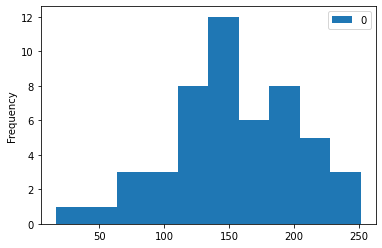

In [11]:
#histogram grafiği
import pandas as pd
pd.DataFrame(olcumler).plot.hist();

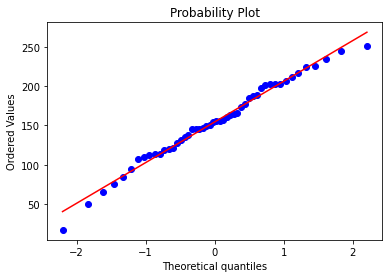

In [10]:
#qqplot
import pylab
stats.probplot(olcumler, dist = "norm", plot = pylab)
pylab.show()

In [13]:
#yukarıdaki grafikte sol taraf örneklem dağılımını sağ taraf ise teorik dağılımı ifade eder.
#çıkarım ise elimizdeki verinin analizi normal bir dağılıma sahip olduğunu söyler.
#teorik dağılım ilgilendiğimiz normal dağılımdır.
#örnek dağılım elimzdeki ölçülerdir.
#teorik ve örnek dağılım aralarındaki bağı belirler. QQPLOT 

In [14]:
#Shapiro-Wilks Testi

###### H0 : Örnek Dağılımı ile teorik normal dağılım arasında isatistiksel olarak anlamlı bir farklılık yoktur.
###### H1 : '''''' fark vardır    

In [15]:
from scipy.stats import shapiro

In [16]:
shapiro(olcumler)

ShapiroResult(statistic=0.9853105545043945, pvalue=0.7848747968673706)

In [17]:
#P VALUE < 0.05 olursa H0 Hipotezi reddedilir.

In [18]:
#görsel olarak güzel olmasını istersek;
print("T Hesap İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan P-Value: "+ str(shapiro(olcumler)[1]))

T Hesap İstatistiği: 0.9853105545043945
Hesaplanan P-Value: 0.7848747968673706


In [19]:
#Hipotez testinin uygulanması

In [21]:
stats.ttest_1samp(olcumler, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

In [23]:
print("Test İstatistiği: " + str(shapiro(olcumler)[0]))
print("Hesaplanan Test P-Value: "+ str(shapiro(olcumler)[1]))

Test İstatistiği: 0.9853105545043945
Hesaplanan Test P-Value: 0.7848747968673706


H0 : Web sitemizde geçirilen ortalama süre 170 saniyedir
H1 : Web sitemizde geçirilen ortalam süre 170 saniyeden farklıdır.

In [25]:
#bu çıkarımlara bakılınca yaptığımız yorum web sitemizde geçirilen süre 170 saniyeden küçüktür.

## Nonparametrik Tek Örneklem Testi

In [27]:
#birden fazla değişken değerlendirmek için nonparametrik kullanılır.
from statsmodels.stats.descriptivestats import sign_test

In [28]:
#sign test = işaret testi demektir.

In [29]:
sign_test(olcumler, 170)

(-7.0, 0.06490864707227217)

In [30]:
#virgülün solundaki genellikle test istatistiğidir, sağında ise p-value

In [31]:
#nonparametriği kullanmamıza gerek yoktu zaten bir önceki testte normal olduğunu anladık p-value 0.05'den küçük çıktığı için h0 hipotez kuramını reddetmiştik.
#nonparametrik testler bir önceki testte eğer normallik çıkmasaydı nonparametriği değerlendirecektik,
#Burada çıkan p-value değerine göre karar alacaktık.

## Shapiro Örneği

In [26]:
from scipy.stats import shapiro
import numpy as np

In [27]:
olcum = np.array([1.4172, 1.4897,-1.2075, 1.6302, -0.0631, 0.6715, 0.7172, 0.7254, 1.4090, -0.2050, -0.1241,0.7147])

In [28]:
shapiro(olcum)

ShapiroResult(statistic=0.9114730954170227, pvalue=0.2228202372789383)

In [29]:
#yukarıdaki sayısal verilerin normal dağılıma mı yoksa normal olmayan dağılıma mı sahip olduğunu ölçmek için shapiro kullandık shapiro tam olarak bu işe yarar.
#shapiro testi sonrası p-value : 0.2 çıktı ve h0 hipotezi reddedilmeyip bu dağılımın normal dağılım olduğu kanatine varıldı.

### Dönüşüm Oranı Testi

In [30]:
#Dönüşüm oranı pazarlama dünyasında e-ticaret dünyasında önemli bir yere sahiptir.
#Örneğin weeb sitesinde satılan bir ürünü 100 kişi gördü 1 kişi aldı bu durumda dönüşüm oranı 1/100'dür.
#reklam olarak da düşünülebilir reklamı gören 100 kişiden 1 kişi tıkladıysa 1/100 orana sahiptir.

### İş Uygulaması: Dönüşüm Oranı Testi

In [31]:
# Problem:
# Bir yazılım ile mecrada reklam verilmiş ve bu reklama ilişkin yazılım tarafından 0.125 dönüşüm oranı elde edilmiştir. 
# Fakat bu durum kontrol edilmek isteniyor. Çünlü bu yüksek bir oran ve gelirler incelendiğinde örtüşmüyor.

In [32]:
# Detaylar:
# 500 kişi dış mecrada reklamlara tıklamış, 40 tanesini sitemize gelip alışveriş yapmış.
# örnek üzerinden elde edilen dönüşüm oranı: 40/500 = 0,08

In [33]:
# hipotezlerim H0 : P = 0.125
# H1 : P esit degil 0.125 
# diyerekten 2 tane hipotez kurduk

In [35]:
from statsmodels.stats.proportion import proportions_ztest
count = 40
nobs = 500
value = 0.125

In [107]:
from statsmodels.stats.proportion import proportions_ztest
count = 40
nobs = 500
value = 0.125
#count, nobs ve value proportions_ztest modelinin bizden istediği argümanlar
# count = tıklayan insanlar
# nobs = toplam gözlem sayımız yani 500 
# value = sınamak istediğimiz veri
#sol kısım z test istatistiği
#sağ taraf p-value'dir
#0.05'den küçükse h0 hipotezi rededilir.
#!!!! yani istatistik olarak çıkarımımız ise 0.125 dönüşüm oranı elde edildiği istatistiksel olarak test edilip onaylanmıştır. (%5 yanılma payı ile)
proportions_ztest(count,nobs , value)

(-3.7090151628513017, 0.0002080669689845979)

## Bağımsız İki Örneklem T Testi (AB Testi)

#### ML modelinin başarı testini kontrol edelim.
## Problem:
### Bir ML projesine yatırım yapılmış. Üretiiği tahminler neticesinde oluşan gelir ile eski sistemin ürettiği gelirler karşılaştırılıp anlamlı farklılık olup olmadığı test edilmek isteniyor.
### Detaylar:
#### Model geliştirilmiş ve web sitesine entegre edilmiş. Site kullanıcıları belirli bir kurala göre ikiye bölünmüş olsun
#### A grubu eski B grubu yeni sistem. Gelir anlamında anlamlı bir iş yapılıp yapılmadığı test edilmek isteniyor.

In [39]:
# ML modeli anlamlı fark oluşturabildi mi ?
# H0: M1 = M1
# H1 : M1 esit degil M1


In [40]:
import pandas as pd

In [41]:
#veriyi düzenlememiz gerekebilir bazı durumlarda aşağıda veri tipi 1 verilmiştir.
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [42]:
#veri seti olarak en kötü halde elimize gelmiş halini düzenledik bu da veri tipi 2

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#A ve A'nın Grubu
GRUP_A = np.arange(len(A)) #A nın içindeki sayı kadar bir grup oluşturacak.
GRUP_A = pd.DataFrame(GRUP_A) # bunu dataframe'e dönüştürecek.
GRUP_A[:] = "A" #grubun içindeki tüm değerleri A yapacak.
A = pd.concat([A, GRUP_A], axis = 1) #daha sonra A ve grubu yan yana getirecek. 

#B ve B'nin Grubu
GRUP_B = np.arange(len(B))
GRUP_B = pd.DataFrame(GRUP_B)
GRUP_B[:] = "B"
B = pd.concat([B, GRUP_B], axis = 1)

#Tum veri
AB = pd.concat([A,B])
AB.columns = ["gelir","GRUP"]
print(AB.head())
print(AB.tail())

   gelir GRUP
0     30    A
1     27    A
2     21    A
3     27    A
4     29    A
    gelir GRUP
25     33    B
26     26    B
27     32    B
28     33    B
29     29    B


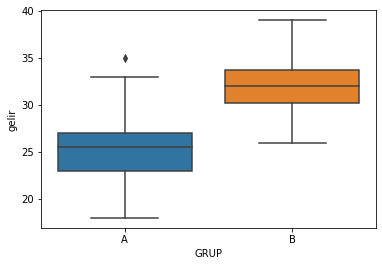

In [43]:
import seaborn as sns
sns.boxplot(x = "GRUP", y = "gelir",data = AB);

In [44]:
#grafiğe göre B grubu daha üstte görünüyor fakat bunun istatistik testini gerçekleştirmeden bir yorum yapmak doğru olmayabilir.

#### VARSAYIM KONTROLÜ

In [45]:
A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [46]:
AB.head()

,gelir,GRUP
0,30,A
1,27,A
2,21,A
3,27,A
4,29,A


### Normallik Varsayımı

In [47]:
from scipy.stats import shapiro
shapiro(A_B.A)
#SHAPİRO olduğu gibi veriyi ister o yüzden AB verisini kullanamıyoruz bu yüzden bu tarz durumlarda veri setini kaliteli bir şekilde düzenlememiz gerekir.,
#p-value 0.7 çıktığı için h0 hipotezi reddedilemez.
#yani birinci grubumuz olan A grubu normal dağılıma sahiptir.

ShapiroResult(statistic=0.9789242148399353, pvalue=0.7962799668312073)

In [48]:
shapiro(A_B.B)
#ikinci grubumuz için ise yine p-value değeri 0.05 değerinden büyük olduğu için H0 hipotezi reddedilemez ve bu yüzden B grubu da normal bir dağılıma sahiptir yorumu yapabiliriz.

ShapiroResult(statistic=0.9561260342597961, pvalue=0.24584221839904785)

In [49]:
shapiro(AB.gelir) # bu şekilde analiz yapılır fakat tek tek ayrı ayrı a ve b olmak üzere analiz etmek daha mantıklı olur.
# istatistikte iş şansa bırakılmaz..

ShapiroResult(statistic=0.9816120862960815, pvalue=0.5004147291183472)

### Varyans Homojenliği Varsayımı

#### H0: Varyanslar Homojendir
#### H1: Varyanslar Homojen değildir.

In [55]:
import pandas as pd
from scipy.stats import levene
from scipy.stats import stats
X,Y = stat, p = levene(A_B.A, A_B.B)

print("Test İstatistiği: " + str(X))
print("Hesaplanan Test P-Value: "+ str(Y))

Test İstatistiği: 1.1101802757158004
Hesaplanan Test P-Value: 0.2964124900636569


In [56]:
#yukarıda hesaplanan test p-value degeri 0.05'ten küçük olmadığı için h0 hipotezi reddedilmez.
#yani varyanslar homojendir.

### Hipotez Testi

In [57]:
stats.ttest_ind(A_B["A"],A_B["B"], equal_var =True)

Ttest_indResult(statistic=-7.028690967745927, pvalue=2.6233215605475075e-09)

In [58]:
# p-value değeri 0.05 den küçüktür bu yüzden h0 hipotezi reddedilir ve çıkarım ise
# equal_var = varyans homojenliğini ifade eder ve yukarıda varyans homojenliğinliğini bulmuştuk bu yüzden true degerini girdik.

In [59]:
# görsel olarak güzel gösterim için
test_istatistiği,pvalue = stats.ttest_ind(A_B["A"],A_B["B"], equal_var =True)
print('Test İstatistiği = %.10f, p-değeri = %.10f'%(test_istatistiği,pvalue))
#%.10f şu demektir noktandan sonra 10 degeri ekrana yazdır 10 yerine 3 4 veya 5 de yazılabilir noktadan sonra kaç sayı göstermek istersek.

Test İstatistiği = -7.0286909677, p-değeri = 0.0000000026


##### Hipotezler testleri sonucunda Eski sistem ve yeni sistem arasında istatistiksel olarak anlamlı bir fark vardır. 

### Nonparametrik Bağımsız İki Örneklem T Testi

#### Varsayalım ki önceki yaptığımız testlerin sonucu negatif olsaydı biz nonparametrik bağımsız iki örneklem T testi uygulayacaktık.

In [60]:
from scipy.stats.mstats import mannwhitneyu
statistic, p_value = mannwhitneyu(A_B["A"],A_B["B"])
print('Test istatistiği= %.10f, p-degeri = %.10f'%(statistic,p_value))

Test istatistiği= 89.5000000000, p-degeri = 0.0000000956


In [61]:
#çıkaracağımız sonuç H0 hipotezini reddetmiş bulunduk buradaki senaryomuzda.
#h0 hipotezini reddederek iki sistem arasında farklılık olduğu çıkarımına vardık.

### Bağımlı İki Örneklem Testi İçin Bir İş Uygulaması

##### Hikaye : bir şirketteki gruba eğitim öncesi ve eğitimi aldıktan sonraki yetkinliklerini test etmek istiyorlar.

#### Problem : belirli uğraşlar sonucunda alınan bir eğitimin katma değer sağlayıp sağlamadığı ölçülmek isteniyor.

#### Detaylar : Bir departman bir konuda eğitim talep ediyor. Gerekli/gereksiz değerlendirmeleri neticesinde eğitim alınıyor.
#### Eğitimden önce ve sonra olacak şekilde gerekli ölçümler yapılıyor.
#### Eğitim sonrasında eğitimin sağladığı katma değer test edilmek isteniyor.

#### H0 : Önceki ortalama = sonraki ortalama
#### H1 : önceki ortalama (esit degildir) sonraki ortalama
##### yani h1 katma değerlik sağlandığını, h0 ise gereksiz olduğu kanaatine vardırıyor. 

In [62]:
oncesi = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

sonrasi = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

In [63]:
oncesi[0:5]

,0
0,123
1,119
2,119
3,116
4,123


In [64]:
sonrasi[0:5]

,0
0,118
1,127
2,122
3,132
4,129


In [65]:
#BIRINCI VERI SETI
AYRIK = pd.concat([oncesi, sonrasi], axis = 1)
AYRIK.columns = ["ONCESI","SONRASI"]
print("'AYRIK' Veri Seti: \n\n ", AYRIK.head(), "\n\n")


#IKINCI VERI SETI
#ONCESI FLAG/TAG'INI OLUSTURMA
GRUP_ONCESI = np.arange(len(oncesi))
GRUP_ONCESI = pd.DataFrame(GRUP_ONCESI)
GRUP_ONCESI[:] = "ONCESI"
#FLAG VE ONCESI DEGERLERINI BIR ARAYA GETIRME
A = pd.concat([oncesi, GRUP_ONCESI], axis = 1)
#SONRASI FLAG/TAG'INI OLUSTURMA
GRUP_SONRASI = np.arange(len(sonrasi))
GRUP_SONRASI = pd.DataFrame(GRUP_SONRASI)
GRUP_SONRASI[:] = "SONRASI"

#FLAG VE SONRASI DEGERLERINI BIR ARAYA GETIRME
B = pd.concat([sonrasi, GRUP_SONRASI], axis = 1)

#TUM VERIYI BIR ARAYA GETIRME
BIRLIKTE = pd.concat([A,B])
BIRLIKTE

#ISIMLENDIRME
BIRLIKTE.columns = ["PERFORMANS","ONCESI_SONRASI"]
print("'BIRLIKTE' Veri Seti: \n\n", BIRLIKTE.head(), "\n")

'AYRIK' Veri Seti: 

     ONCESI  SONRASI
0     123      118
1     119      127
2     119      122
3     116      132
4     123      129 


'BIRLIKTE' Veri Seti: 

    PERFORMANS ONCESI_SONRASI
0         123         ONCESI
1         119         ONCESI
2         119         ONCESI
3         116         ONCESI
4         123         ONCESI 



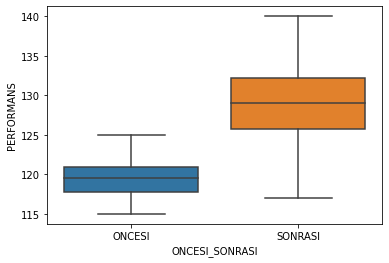

In [66]:
import seaborn as sns
sns.boxplot(x = "ONCESI_SONRASI", y = "PERFORMANS", data = BIRLIKTE);

In [67]:
#GRAFİĞE GÖRE ORTALAMALAR BİRBİRİNE EŞİT DEGİL VE KATMA DEĞER OLMUŞ GİBİ GÖRÜNÜYOR AMA İSTATİSTİKSEL OLARAK KANITLAMAMIZ GEREKİYOR.

In [ ]:
#shapiro ile normallik dağılımını test edelim.

In [73]:
shapiro(AYRIK.ONCESI)

ShapiroResult(statistic=0.9543656706809998, pvalue=0.10722451657056808)

In [69]:
#p-value 0.05'ten küçük olmadığı için H0 hipotezi reddilmedi ve bu yüzden normal bir dağılıma sahip olduğu kanısına vardık.

In [74]:
shapiro(AYRIK.SONRASI)

ShapiroResult(statistic=0.9780089259147644, pvalue=0.6159515380859375)

In [75]:
#öncesi ve sonrası olarak iki istatistiksel normallik analizi yaptık ve 0.05'ten küçük olmadıkları için normal bir dağılıma sahip oldukları anlamına geliyor.

In [80]:
from scipy.stats import levene
x,y = stats, p = levene(AYRIK.ONCESI,AYRIK.SONRASI)
print("Test İstatistiği: "  + str(stats))
print("P-Value Değeri: " + str(p))

Test İstatistiği: 8.31303288672351
P-Value Değeri: 0.0050844511807370246


In [83]:
#levene istatistiği sonucunda çıkan p-value değeri 0.05'ten küçük çıktığı için H0 hipotezi olan homojendir hipotezi reddedildi.
#yani veri homojen olmadığı kanaatine vardık.

In [85]:
#bu süreçten sonrasında veri üzerindeki aykırılıklar düzenlenerek devam edilebilir.
#ve bazen bu varsayım göz ardı edilebilir.

##### Şu an ki süreçte bu varsayımı kabul eder gibi düşünüp devam edeceğiz
##### Bağımlı iki örneklem T Testi uygulayalım

In [95]:
import pandas as pd
from scipy.stats import stats

t_statistic, p_value = stats.ttest_rel(AYRIK['ONCESI'], AYRIK['SONRASI'])
print('Test İstatistiği:  %.5f, P Degeri:  %.5f' %(t_statistic,p_value))

Test İstatistiği:  -9.28153, P Degeri:  0.00000


In [96]:
#bağımlı iki örneklem t testinin h0 hipotezi: öncesi ve sonrası işlemleri arasında anlamlı bir ortalama fark yokturu savunur ve tam tamına 5 sıfırla bu durumun reddedildiği istatistel olarak görülüyor.
#bu p-value değeri sonrasında çıkarmamız gereken sonuç 0.05'ten küçük oldugu icin eğitimden önceki durumun eğitimden sonraki durumdan cok daha kötü oldugu sonucuna geliriz.

### Diyelim ki normallik varyansı ve homojenlik varsayımı sağlanmadı olarak düşünelim ve bu yüzden NONPARAMETRİK BAĞIMLI İKİ ÖRNEKLEM TESTİ YAPALIM.

In [104]:
from scipy.stats import wilcoxon
a,b = wilcoxon(AYRIK.ONCESI,AYRIK.SONRASI)
print('Test İstatistiği : %.10f , p-degeri: %.10f' % (a,b))

Test İstatistiği : 15.0000000000 , p-degeri: 0.0000002491


In [105]:
#görüldüğü üzere p-degeri 0.05'ten küçük olduğu için h0 hipotezi reddedilir.
#H0 hipotezi : oncesi ve sonrası arasında anlamlı bir fark gözlenmemektedir çıkarımıydı ve bunu yine nonparamterik testler ile reddettik.
#çıkarım sonucu ise eğitim öncesi ve sonrasında anlamlı bir fark vardır.

### İş Uygulaması : Kullanıcı Arayüzü Deneyi(AB Testi)

##### H0: P1<= P2
##### H1 : P1>P2
#### BİR ALIŞVERİŞ SİTESİNİN KIRMIZI BUTON MU YEŞİL BUTON MU KULLANIMI SONUCU DAHA ÇOK TIKLANMA ALIR SORUSUNA CEVAP BULALIM

#### Detaylar:
##### YEŞİL 1000 GÖRÜNTÜLENME 300 TIKLANMA
##### KIRMIZI 1100 GÖRÜNTÜLENME 250 TIKLANMA

In [106]:
#oransal istatistik yapacağımız için 
# yesil = 1000/300
# kırmızı = 1100/250

In [112]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np
basari_sayisi = np.array([300,250])
gozlem_sayilari = ([1000,1100])

In [117]:
x,y = proportions_ztest(count = basari_sayisi, nobs = gozlem_sayilari)
print('Test İstatistiği : %.6f , P-Değeri: %.6f' % (x,y))

Test İstatistiği : 3.785786 , P-Değeri: 0.000153


In [118]:
#görüldüğü üzere p-değeri 0.05'ten çok küçük olduğu için H0 hipotezimiz reddedilmiş durumda oluyor.
#yani aralarında anlamlı bir fark oluşup yeşilin ortalaması kırmızının ortalamasından istatistiksel olarak daha yüksek olup yeşil buton seçilmiştir.

### İş Uygulaması : Kullanıcı Arayüzü Deneyi(AB Testi)
##### H0: P1<= P2
##### H1 : P1>P2
#### Anasayfada geçirilen süre aktarılmak isteniyor.
#### Detaylar:
##### Bir web stiesi için başarı kriterleri: ortalama ziyaret süresi, hemen çıkış oranı vb.
##### uzun zaman geçiren kullanıcıların reklamlara daha fazla tıkladığı ve markaya olan bağlılıklarının arttığı biliniyor.
##### buna yönelik olarak benzer haberler farklı resimler ya da farklı formatlarda hazırlanarak oluşturulan test gruplarına gösteriliyor.
##### A: Doğal şekilde, B: Yönlendirici ve C:ilgi çekici

In [147]:
A = pd.DataFrame([28,33,30,29,28,29,27,31,30,32,28,33,25,29,27,31,31,30,31,34,30,32,31,34,28,32,31,28,33,29])

B = pd.DataFrame([31,32,30,30,33,32,34,27,36,30,31,30,38,29,30,34,34,31,35,35,33,30,28,29,26,37,31,28,34,33])

C = pd.DataFrame([40,33,38,41,42,43,38,35,39,39,36,34,35,40,38,36,39,36,33,35,38,35,40,40,39,38,38,43,40,42])

GRUP_A = "GRUP_A"
GRUP_B = "GRUP_B"
GRUP_C = "GRUP_C"

dfs = [A, B, C]

ABC = pd.concat(dfs, axis = 1)
ABC.columns = ["GRUP_A","GRUP_B","GRUP_C"]
ABC.head()

,GRUP_A,GRUP_B,GRUP_C
0,28,31,40
1,33,32,33
2,30,30,38
3,29,30,41
4,28,33,42


In [133]:
shapiro(ABC["GRUP_A"])

ShapiroResult(statistic=0.969743549823761, pvalue=0.5321813225746155)

In [134]:
shapiro(ABC["GRUP_B"])

ShapiroResult(statistic=0.9789854884147644, pvalue=0.7979801297187805)

In [135]:
shapiro(ABC["GRUP_C"])

ShapiroResult(statistic=0.9579201340675354, pvalue=0.273820161819458)

In [136]:
#Verilerin normallik dağılımını analiz ettiğimizde p-value degerlerinin hiçbiri a,b ve c için 0.05'ten küçük değil bu yüzden bu verilerin normal olduğu kanısına vardık.

In [149]:
x,y =  statistic, pvalue = levene(ABC[GRUP_A],ABC[GRUP_B],ABC[GRUP_C])
print('Test İstatistiği: %.5f , P-Değeri : %.5f ' % (x,y))

Test İstatistiği: 1.02674 , P-Değeri : 0.36247 


In [150]:
#p-değeri 0.05'ten büyük olduğu için H0 hipotezi reddedilmedi ve yaptığımız varyans homojenliği sağlanmıştır dedik.
#H0 hipotezi homojendir demekti, H1 hipotezi homojen değildir demekti.

#### HİPOTEZ TESTİNİN UYGULANMASI

In [152]:
#burada hipotez testlerimizi oluşturacağız.
from scipy.stats import f_oneway

In [157]:
x,y = f_oneway(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])
print('Test İstatistiği: %.10f , P-Değeri: %.10f'%(x,y))

Test İstatistiği: 74.6927814073 , P-Değeri: 0.0000000000


In [158]:
#test sonucumuzdan anlam çıkarmak istersek istatistiksel olarak gruplar arasında anlamlı bir fark olduğu kanısına varıyoruz.
#aynı zamanda p-değeri 0.05'ten küçük olduğu için h0 hipotezini reddettik. h0 hipotezi = aralarında bir fark olmadığıydı.

In [159]:
ABC.describe().T

,count,mean,std,min,25%,50%,75%,max
GRUP_A,30.0,30.133333,2.224214,25.0,28.25,30.0,31.75,34.0
GRUP_B,30.0,31.700000,2.937862,26.0,30.00,31.0,34.00,38.0
GRUP_C,30.0,38.100000,2.808239,33.0,36.00,38.0,40.00,43.0


In [160]:
#ortalamalara bakınca c grubu(ilgi cekici) istatistiksel olarak diğer gruplara göre daha değer gördüğü tabloda dikkat çekmiştir.

## NonParametrik Hipotez Testi

In [162]:
#varasyalım ki önceki f_oneway hipotez testimiz sağlanmadı ve nonparametrik test yapmak zorunda kaldık.
#varsayımlarımız homojenlik ve normallikti bunların sağlanmadığını düşünüp nonparametrik hipotez testi yapalım.
#bu durumda şöyle bir işlem gerekiyor.
#kruskal metodu
from scipy.stats import kruskal

In [166]:
kruskal(ABC["GRUP_A"],ABC["GRUP_B"],ABC["GRUP_C"])
print('Test İstatistiği: %.10f, P-Değeri: %.10f ' % (x,y))

Test İstatistiği: 74.6927814073, P-Değeri: 0.0000000000 


In [167]:
#p-değerine bakarsak gruplar arasında ortalamaların farklı olduğu çıktısına erişebiliriz.

## Korelasyon Analizi

### İş Uygulaması : Bahşiş ile Ödenen Hesap Arasındaki İlişkinin İncelenmesi

#### H0: p = 0
#### H1: p esit değildir 0
#### h0'ı reddetmek isteriz çünkü h0 aralarında bir bağ olmadığını söyler.
# ------------------ YENİ BİR VERİ SETİ VE HİKYAESİ----------------------
# total_bill : yemeğin fiyatı (bahşiş ve vergiler dahil)
### tip : bağış
### sex : ücreti ödeyen kişinin cinsiyedi (0 = male, 1 = female)
### smoker : grupta sigara içen var mı (0 =no,1=yes)
### day : gün (3=thur,4=fri,5=sat,6=sun)
### time : ne zaman? (0=day,1=night)
### size : grupta kaç kişi var ?

In [2]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df["total_bill"] = df["total_bill"] - df["tip"]

In [4]:
#veri setinin içindeki toplam ödeme kolonuna bahşiş ve vergiler dahilmiş,
#bir korelasyon yapmak istersek birbirlerinden doğal olarak bağımsız olmalılar ki biz detaylı bir ilişki kurabilelim.

In [7]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


In [8]:
#karşılaştırıldığı üzere artık total_bill düzenlendi.

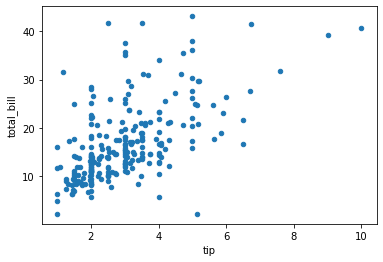

In [12]:
import matplotlib.pyplot as plt
df.plot.scatter("tip","total_bill");

In [13]:
#pozitif korelasyon hakim ve total_bill artıkça tip'inde arttığını görebiliyoruz.
#şimdi ise varsayım ve hipotez kontrolünü ele alalım

In [14]:
from scipy.stats import shapiro
x,y = shapiro(df["total_bill"])
print('Test İstatistiği : %.10f , P-Value : %.10f' % (x,y))
z,t = shapiro(df["tip"])
print('Test İstatistiği : %.10f , P-Value : %.10f ' % (z,t))

Test İstatistiği : 0.9135652184 , P-Value : 0.0000000001
Test İstatistiği : 0.8978112340 , P-Value : 0.0000000000 


In [16]:
#p-value değerlerine bakıldığında bu veri setinin normal bir dağılıma sahip olduğu yorumu yapılıyor.
#normal dağılım için h0 hipotezi reddedildi.

In [17]:
#şimdi normal dağılımı reddetmediğimizi varsayarak diğer testlerimizi de gerçekleştireceğiz.
#parametrik testimizi yapalım bundan sonra ise nonparametrik testleri gerçekleştirelim.

### Korelasyon Katsayısı ve Anlamlılığının Testi

In [19]:
#korelasyon katsayısı
df["tip"].corr(df["total_bill"])
#yukarıdaki komut ile bir korelasyon katsayısı aldık.

0.5766634471096382

In [20]:
#corr fonsiyonu ön tanımlı olarak Pearson korelasyon katsayısını verir.
#Pearson korelasyon katsayısı veya Pearson korelasyon katsayısı veya Pearson's r istatistikte iki değişken arasındaki ilişkinin gücünün ve birbirleriyle olan ilişkilerinin ölçümü olarak tanımlanır. 
#Basit bir ifadeyle, Pearson korelasyon katsayısı, bir değişken değiştiğinde diğer değişkendeki değişimin etkisini hesaplar.

In [21]:
df["tip"].corr(df["total_bill"], method = "spearman")

0.593691939408997

In [ ]:
#spearman korelasyon katsayısı normallik sağlanmadığında kullanılılır
#Korelasyon analizi değişkenler arası ilişkilerin yönünü ve derecesini tanımlamak için kullanılan bir istatistiksel analiz tekniğidir. 
#İstatistik analizi uygulamalarında verilerimiz nicel veya sıralayıcı (ordinal) ölçeğe sahip olduğunda Spearman korelasyon analizine başvurabiliriz.

In [22]:
#YORUMLAMA VAKTİ
#değişkenlerin arasında pozitif bir ilişki var ve ilişkinin şiddeti orta şiddetli ve %60 civarlarında.

In [23]:
#çıktıda aldığımız 0.59 değerini anlamlı olup olmadığının analizini yapabilmek için scipy.stats kütüphanesinden pearsonr'ı import ediyoruz.
from scipy.stats import pearsonr

In [25]:
g,i = pearsonr(df["tip"],df["total_bill"])
print('Test İstatistiği : %.10f , P-Value : %.10f ' % (g,i))

Test İstatistiği : 0.5766634471 , P-Value : 0.0000000000 


In [26]:
#p-valueye göre analiz yapmak istersek çıkan p-value değeri 0.05'ten küçük olduğu için aralarında bir anlam yoktur diyen H0 hipotezini reddederek aralarında bir anlam olduğunu kanıtlamış bulunuyoruz.

### NonParametrik Hipotez Test Uygulaması

In [31]:
from scipy.stats import spearmanr
u,k = spearmanr(df["tip"],df["total_bill"])
print('Korelasyon Katsayısı : %.10f , P-Value : %.10f ' % (u,k))

Korelasyon Katsayısı : 0.5936919394 , P-Value : 0.0000000000 


In [32]:
#Yaptığımız non-parametrik test sonucu p-value tekrardan 0.05'ten küçük çıkarak aralarında bir anlam olduğunu 3.kez kanıtlamış bulunduk.
#bu ilişki orta şiddettedir ve %60'tır aynı zamanda pozitif yönlüdür.
#bir diğer test ise kendal testidir.
#kendal testi : uygulamada pratikte spearman işe yarar ama garanti olmasını istersek bir test istatistiğine daha bakmak istersek aşağıdaki test kodunu kullanabiliriz.

In [35]:
from scipy.stats import kendalltau
g,i = kendalltau(df["tip"],df["total_bill"])
print('Korelasyon Katsayısı : %.10f , P-Value Değeri : %.10f ' % (g,i))

Korelasyon Katsayısı : 0.4400790075 , P-Value Değeri : 0.0000000000 


In [37]:
#biraz daha temkinli bir korelasyon katsayısı olarak yorumlayabiliriz kendalltau'yu.
#genel olarak çoğu işlemde spearmanr kullanılabilir.